In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('C:/Users/HP/Documents/DataTrained/Intern Assignments/Questions/Project-Housing--2---1-/Project-Housing_splitted/train.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [3]:
train.isnull().sum().sum()

5558

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

### Dropping columns which has no relevance

In [5]:
train = train.drop(columns = ['Id'],axis = 1)

In [6]:
train.shape

(1168, 80)

## Handling null values

In [7]:
train['LotFrontage'] = train['LotFrontage'].fillna(train['LotFrontage'].median())
train['Alley'] = train['Alley'].fillna('None')
train['MasVnrType'] = train['MasVnrType'].fillna('None')
train['MasVnrArea'] = train['MasVnrArea'].fillna(0)
train['BsmtQual'] = train['BsmtQual'].fillna('None')
train['BsmtCond'] = train['BsmtCond'].fillna('None')
train['BsmtExposure'] = train['BsmtExposure'].fillna('None')
train['BsmtFinType1'] = train['BsmtFinType1'].fillna('None')
train['BsmtFinType2'] = train['BsmtFinType2'].fillna('None')
train['FireplaceQu'] = train['FireplaceQu'].fillna('None')
train['GarageType'] = train['GarageType'].fillna('None')
train['GarageYrBlt'] = train['GarageYrBlt'].fillna(0)
train['GarageFinish'] = train['GarageFinish'].fillna('None')
train['GarageQual'] = train['GarageQual'].fillna('None')
train['GarageCond'] = train['GarageCond'].fillna('None')
train['PoolQC'] = train['PoolQC'].fillna('None')
train['Fence'] = train['Fence'].fillna('None')
train['MiscFeature'] = train['MiscFeature'].fillna('None')

In [8]:
train.isnull().sum().sum()

0

## Visualization for continuous data

In [9]:
train_cont = ['LotFrontage','LotArea','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF',
                   'TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','GarageYrBlt','GarageArea','WoodDeckSF',
                   'OpenPorchSF','EnclosedPorch','3SsnPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold',
                   'YrSold']

In [10]:
train[train_cont].shape

(1168, 25)

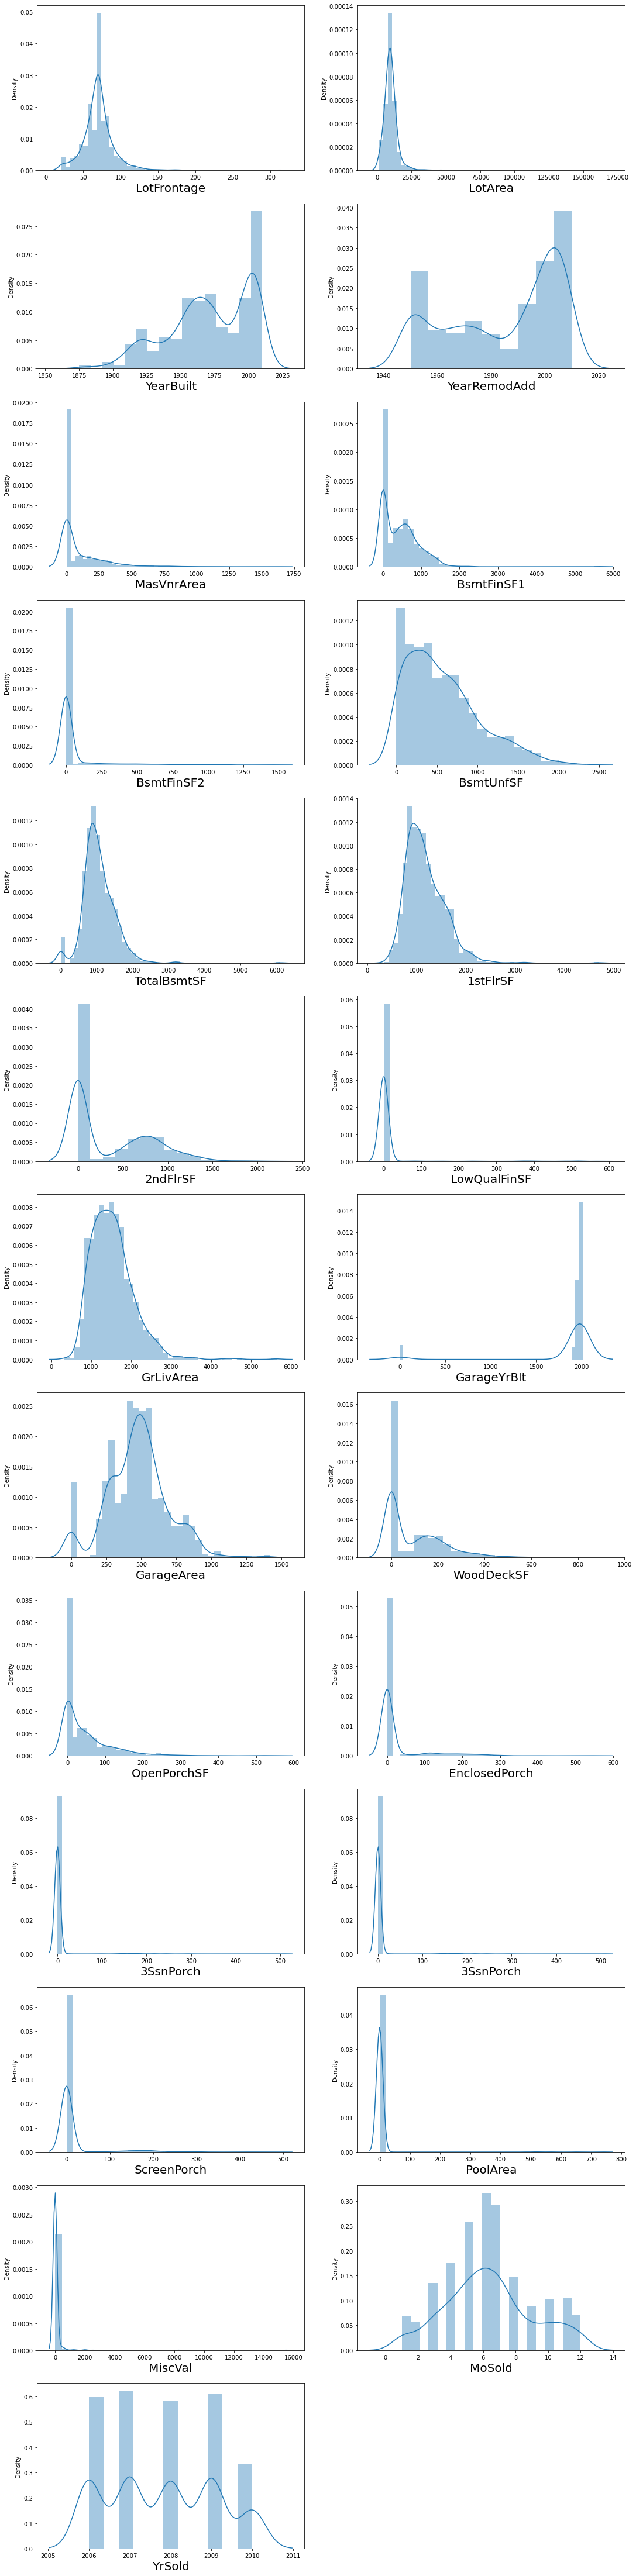

In [11]:
plt.figure(figsize = (18,80))
plotnumber = 1

for i in train[train_cont] :
    if plotnumber <=25 :
        ax = plt.subplot(13,2,plotnumber)
        sns.distplot(train[train_cont][i])
        plt.xlabel(i,fontsize = 20)
    plotnumber +=1
plt.show()

In [12]:
train[train_cont].skew()

LotFrontage       2.733440
LotArea          10.659285
YearBuilt        -0.579204
YearRemodAdd     -0.495864
MasVnrArea        2.835718
BsmtFinSF1        1.871606
BsmtFinSF2        4.365829
BsmtUnfSF         0.909057
TotalBsmtSF       1.744591
1stFlrSF          1.513707
2ndFlrSF          0.823479
LowQualFinSF      8.666142
GrLivArea         1.449952
GarageYrBlt      -3.898694
GarageArea        0.189665
WoodDeckSF        1.504929
OpenPorchSF       2.410840
EnclosedPorch     3.043610
3SsnPorch         9.770611
3SsnPorch         9.770611
ScreenPorch       4.105741
PoolArea         13.243711
MiscVal          23.065943
MoSold            0.220979
YrSold            0.115765
dtype: float64

In [13]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')

train[train_cont] = scaler.fit_transform(train[train_cont].values)
train[train_cont].skew()

LotFrontage       0.155904
LotArea           0.032509
YearBuilt        -0.126641
YearRemodAdd     -0.225131
MasVnrArea        0.439526
BsmtFinSF1       -0.404528
BsmtFinSF2        2.394737
BsmtUnfSF        -0.284390
TotalBsmtSF       0.286779
1stFlrSF         -0.002391
2ndFlrSF          0.280208
LowQualFinSF      6.922843
GrLivArea        -0.000054
GarageYrBlt      -3.815690
GarageArea       -0.320370
WoodDeckSF        0.113026
OpenPorchSF      -0.002749
EnclosedPorch     2.022616
3SsnPorch         7.087955
3SsnPorch         7.087955
ScreenPorch       3.067153
PoolArea         12.817372
MiscVal           4.991071
MoSold           -0.035838
YrSold            0.112893
dtype: float64

## Visualization for categorical data

In [14]:
train_cat = train.drop(train[train_cont],axis = 1)

In [15]:
train_cat.shape

(1168, 56)

The value counts for MSSubClass is

20     428
60     244
50     113
120     69
70      53
30      52
160     47
80      43
90      41
190     26
85      19
75      14
45      10
180      6
40       3
Name: MSSubClass, dtype: int64 



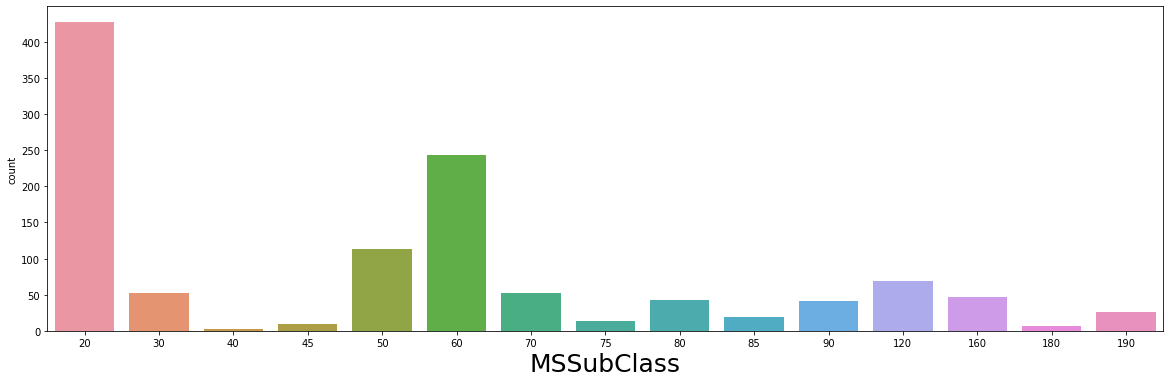

The value counts for MSZoning is

RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64 



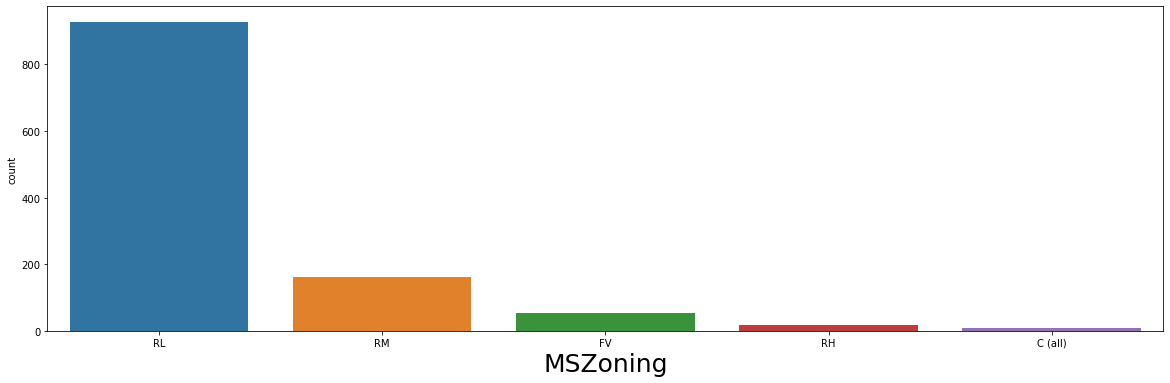

The value counts for Street is

Pave    1164
Grvl       4
Name: Street, dtype: int64 



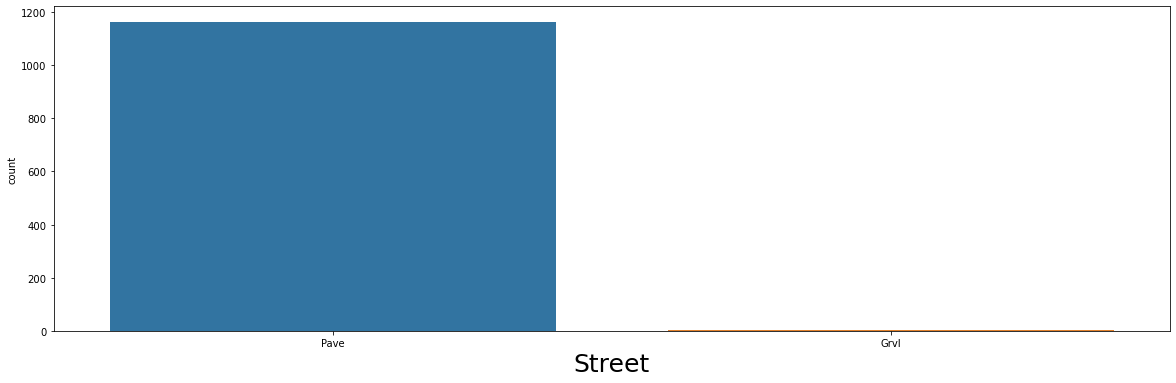

The value counts for Alley is

None    1091
Grvl      41
Pave      36
Name: Alley, dtype: int64 



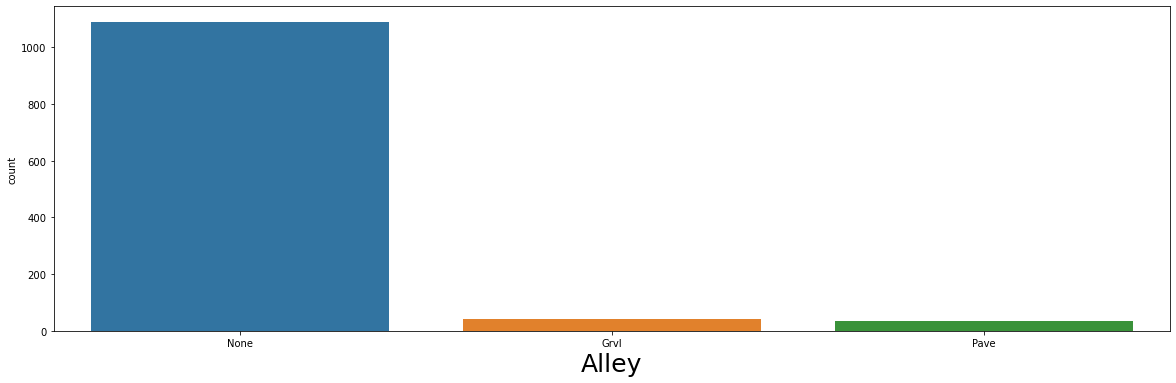

The value counts for LotShape is

Reg    740
IR1    390
IR2     32
IR3      6
Name: LotShape, dtype: int64 



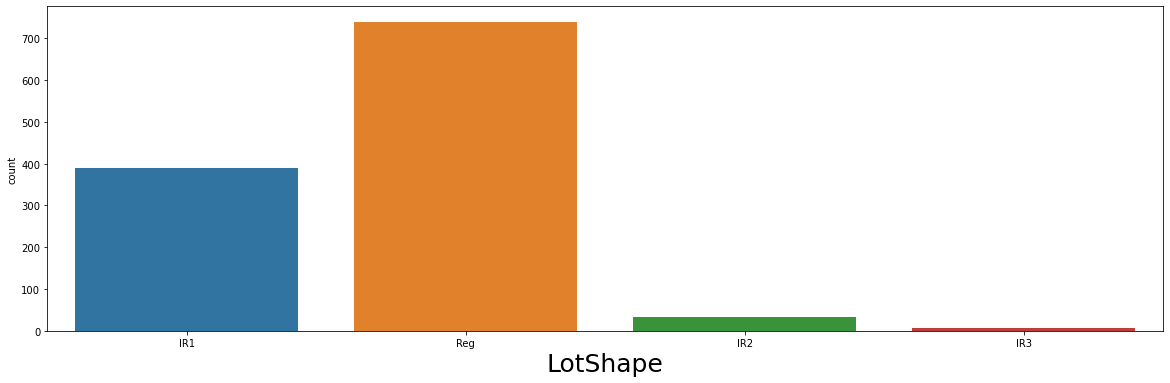

The value counts for LandContour is

Lvl    1046
Bnk      50
HLS      42
Low      30
Name: LandContour, dtype: int64 



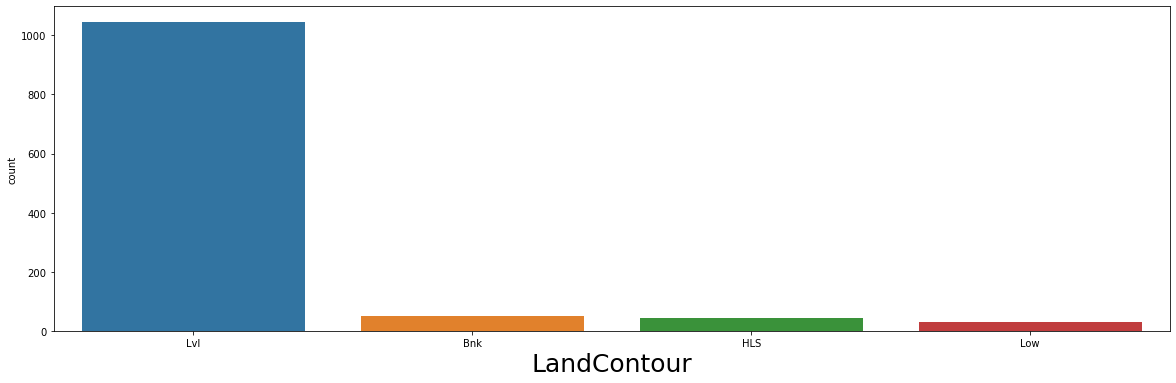

The value counts for Utilities is

AllPub    1168
Name: Utilities, dtype: int64 



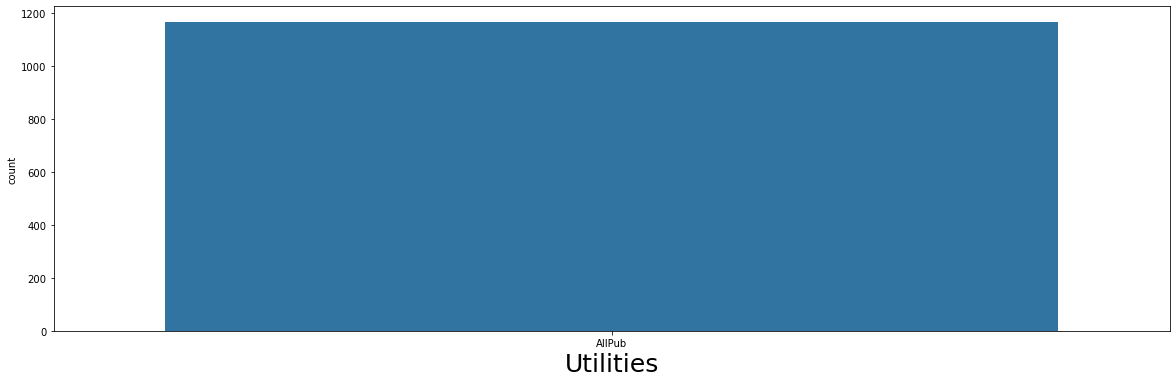

The value counts for LotConfig is

Inside     842
Corner     222
CulDSac     69
FR2         33
FR3          2
Name: LotConfig, dtype: int64 



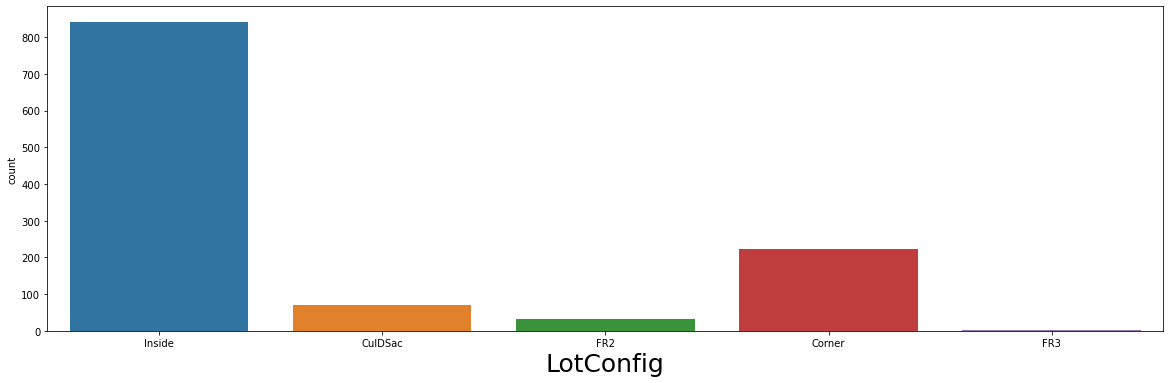

The value counts for LandSlope is

Gtl    1105
Mod      51
Sev      12
Name: LandSlope, dtype: int64 



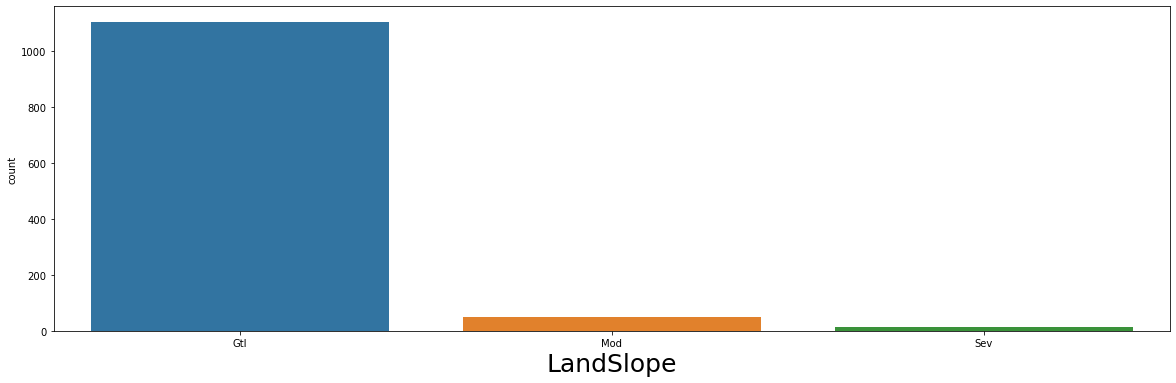

The value counts for Neighborhood is

NAmes      182
CollgCr    118
OldTown     86
Edwards     83
Somerst     68
Gilbert     64
NridgHt     61
Sawyer      60
NWAmes      59
SawyerW     51
BrkSide     50
Crawfor     45
NoRidge     35
Mitchel     34
IDOTRR      30
Timber      24
ClearCr     24
SWISU       21
StoneBr     19
Blmngtn     15
BrDale      11
MeadowV      9
Veenker      9
NPkVill      8
Blueste      2
Name: Neighborhood, dtype: int64 



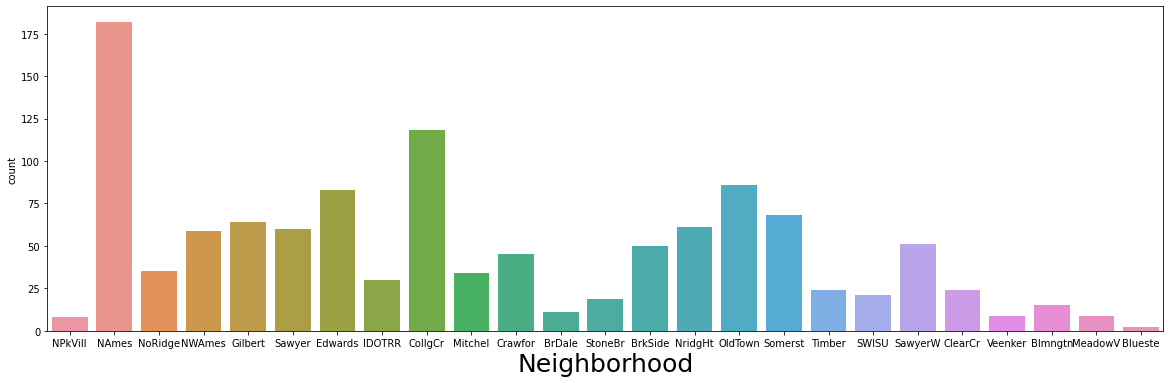

The value counts for Condition1 is

Norm      1005
Feedr       67
Artery      38
RRAn        20
PosN        17
RRAe         9
PosA         6
RRNn         4
RRNe         2
Name: Condition1, dtype: int64 



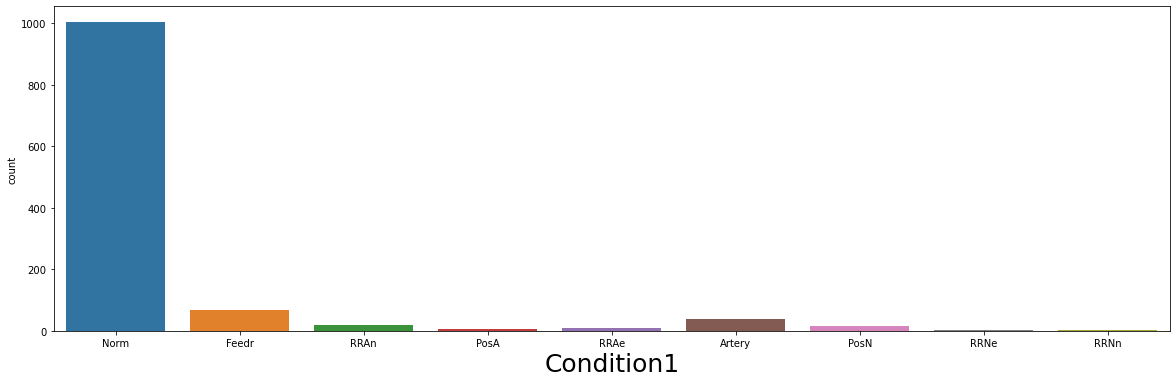

The value counts for Condition2 is

Norm      1154
Feedr        6
PosN         2
Artery       2
RRAe         1
RRNn         1
PosA         1
RRAn         1
Name: Condition2, dtype: int64 



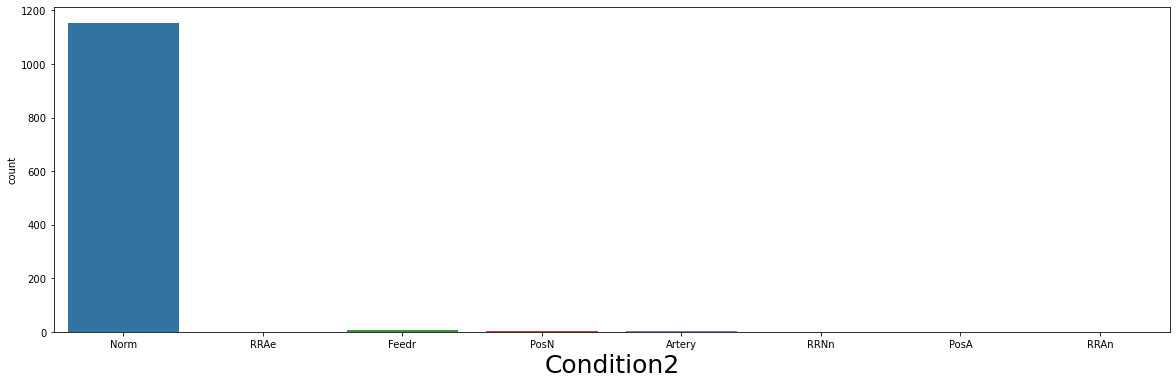

The value counts for BldgType is

1Fam      981
TwnhsE     90
Duplex     41
Twnhs      29
2fmCon     27
Name: BldgType, dtype: int64 



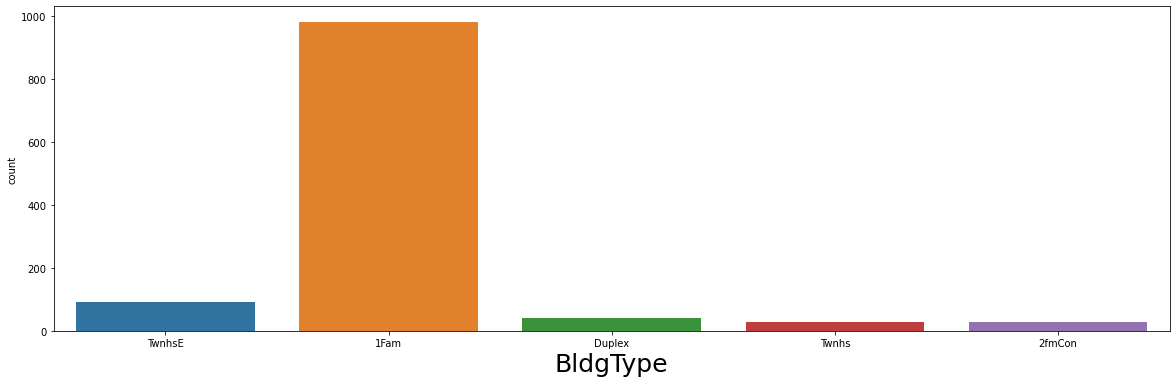

The value counts for HouseStyle is

1Story    578
2Story    361
1.5Fin    121
SLvl       47
SFoyer     32
1.5Unf     12
2.5Unf     10
2.5Fin      7
Name: HouseStyle, dtype: int64 



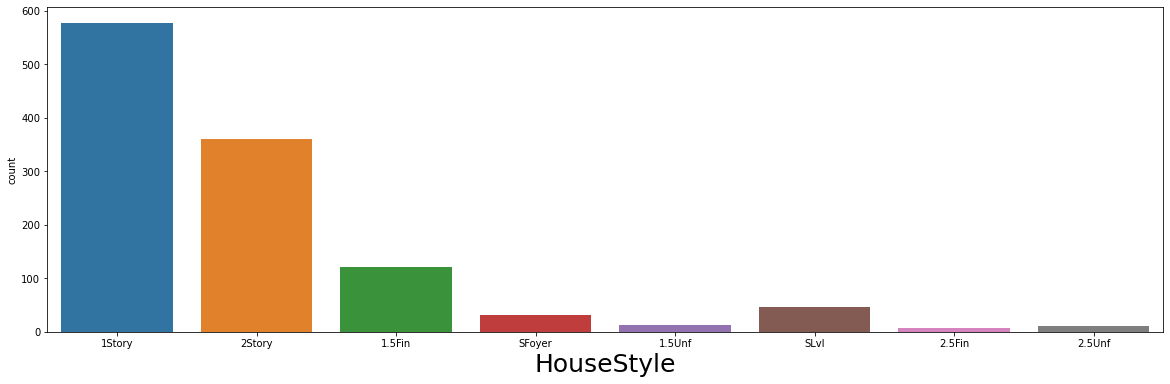

The value counts for OverallQual is

5     314
6     295
7     260
8     138
4      93
9      32
3      16
10     15
2       3
1       2
Name: OverallQual, dtype: int64 



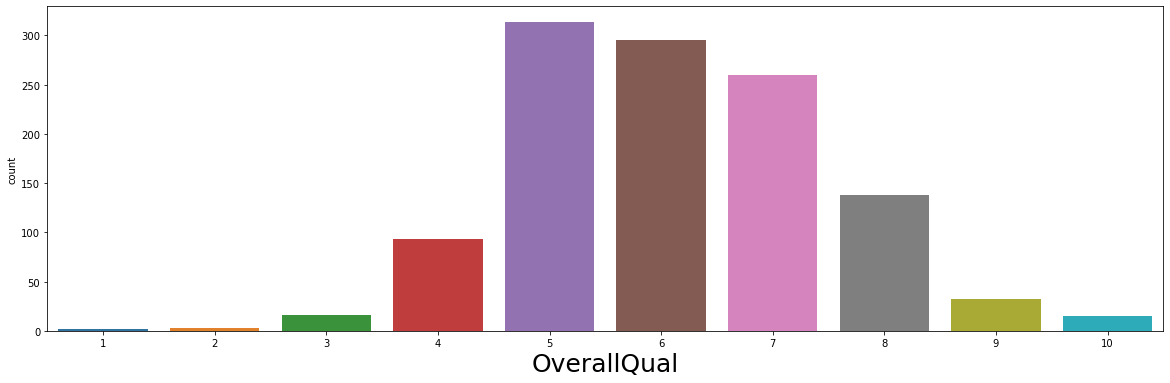

The value counts for OverallCond is

5    640
6    209
7    172
8     61
4     43
3     21
9     16
2      5
1      1
Name: OverallCond, dtype: int64 



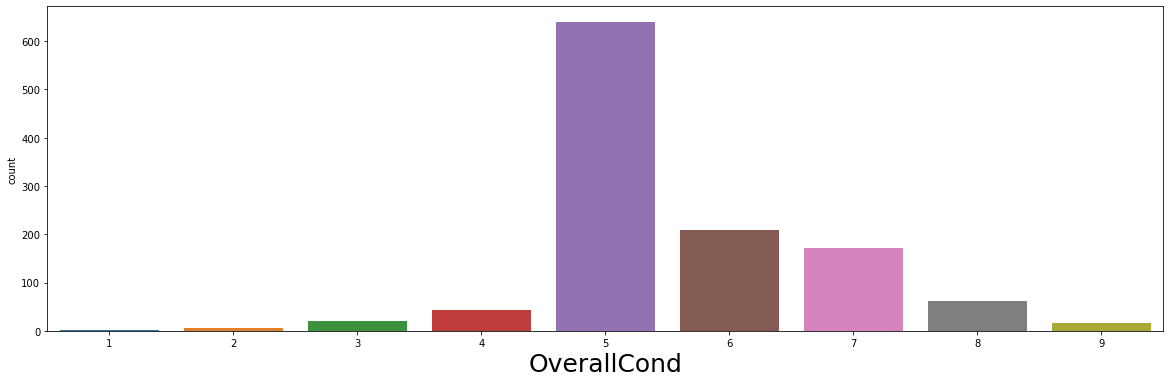

The value counts for RoofStyle is

Gable      915
Hip        225
Flat        12
Gambrel      9
Mansard      5
Shed         2
Name: RoofStyle, dtype: int64 



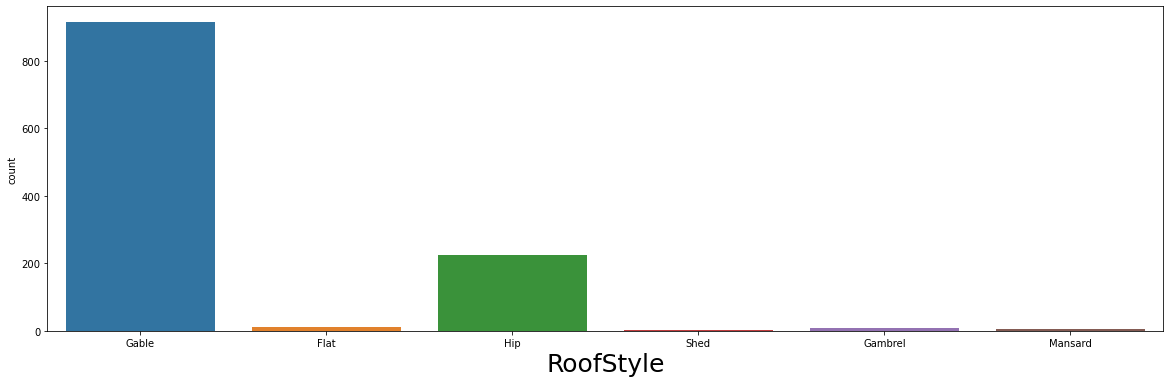

The value counts for RoofMatl is

CompShg    1144
Tar&Grv      10
WdShngl       6
WdShake       4
Roll          1
ClyTile       1
Metal         1
Membran       1
Name: RoofMatl, dtype: int64 



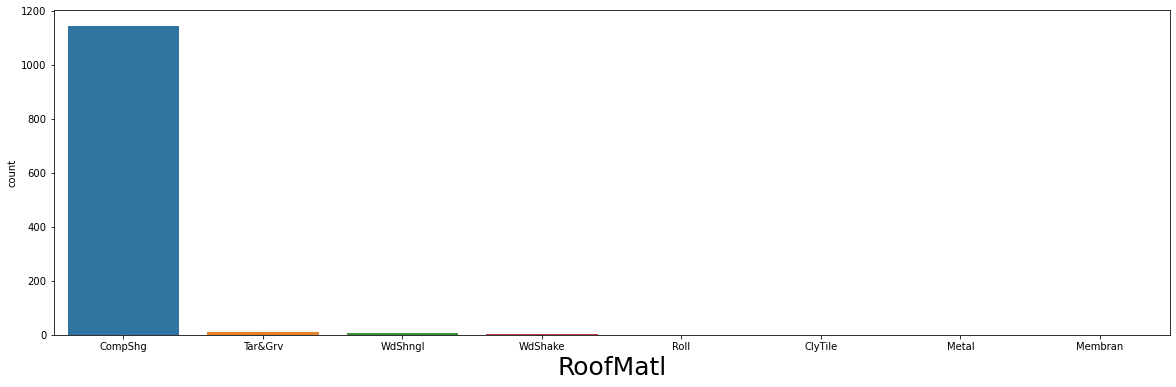

The value counts for Exterior1st is

VinylSd    396
HdBoard    179
MetalSd    178
Wd Sdng    174
Plywood     93
CemntBd     42
BrkFace     41
Stucco      22
WdShing     19
AsbShng     19
Stone        2
AsphShn      1
ImStucc      1
BrkComm      1
Name: Exterior1st, dtype: int64 



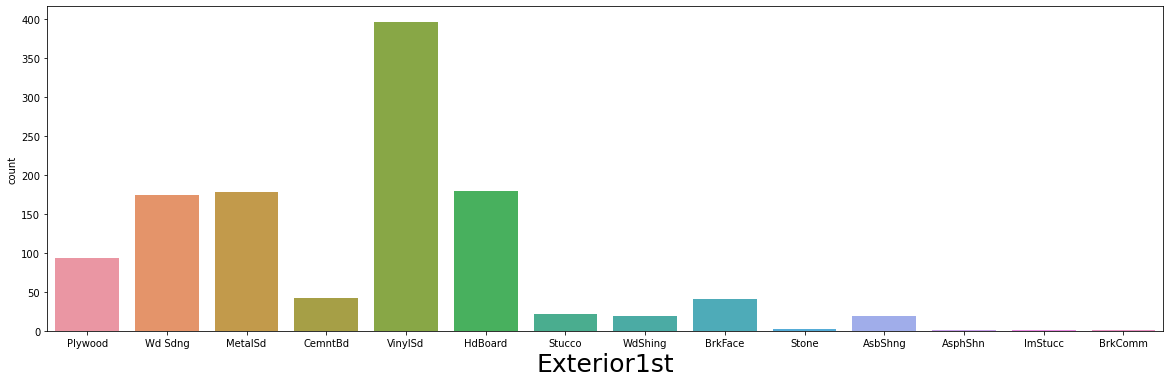

The value counts for Exterior2nd is

VinylSd    387
MetalSd    173
HdBoard    170
Wd Sdng    165
Plywood    118
CmentBd     42
Wd Shng     31
Stucco      23
BrkFace     20
AsbShng     18
ImStucc      8
Brk Cmn      5
Stone        4
AsphShn      3
Other        1
Name: Exterior2nd, dtype: int64 



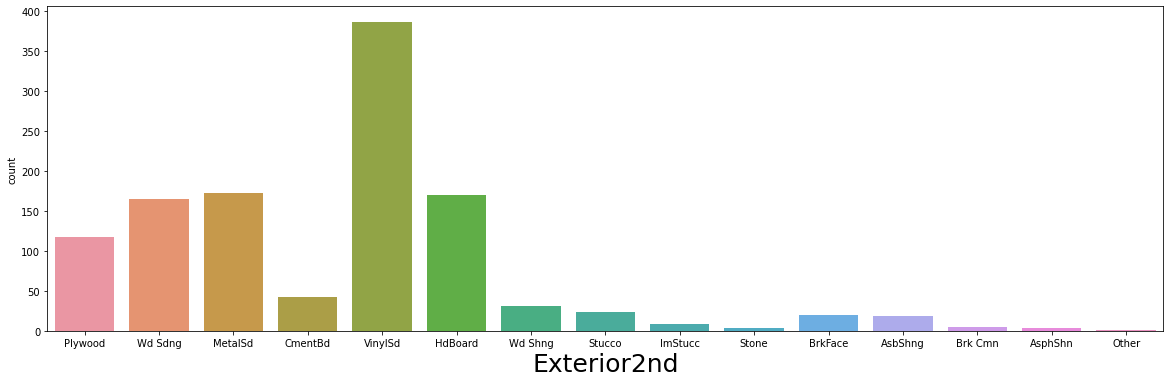

The value counts for MasVnrType is

None       703
BrkFace    354
Stone       98
BrkCmn      13
Name: MasVnrType, dtype: int64 



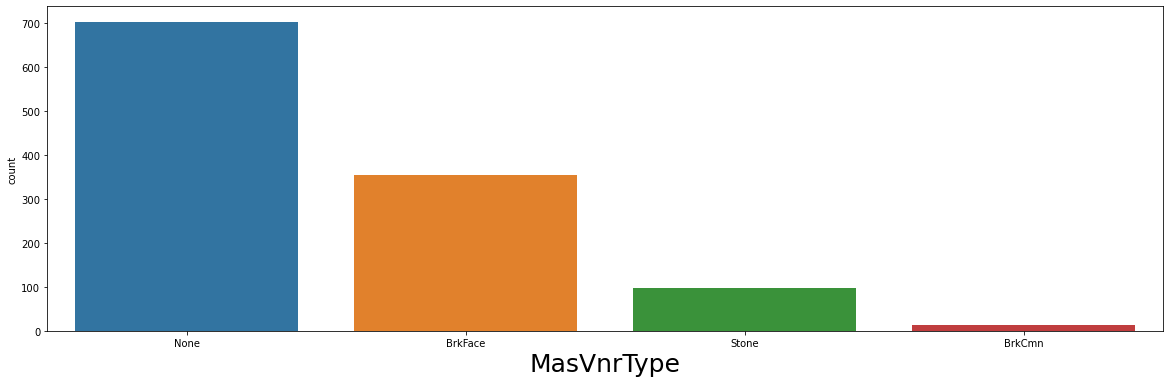

The value counts for ExterQual is

TA    717
Gd    397
Ex     43
Fa     11
Name: ExterQual, dtype: int64 



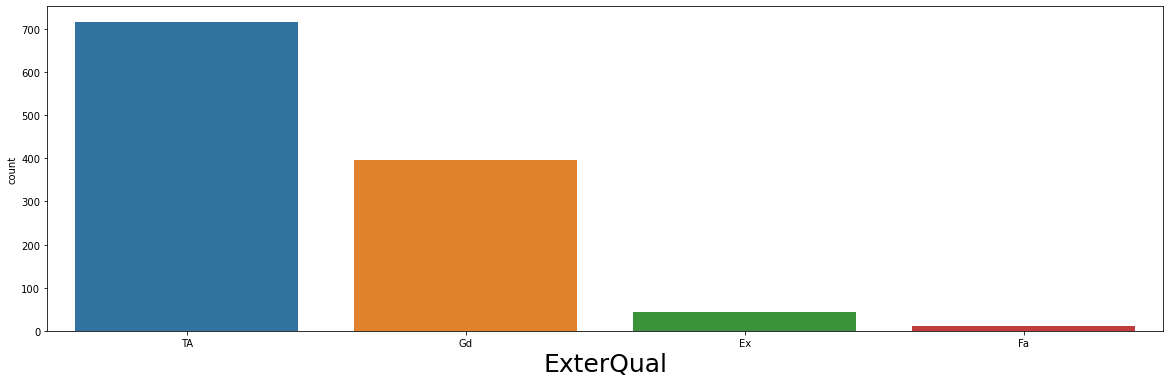

The value counts for ExterCond is

TA    1022
Gd     117
Fa      26
Ex       2
Po       1
Name: ExterCond, dtype: int64 



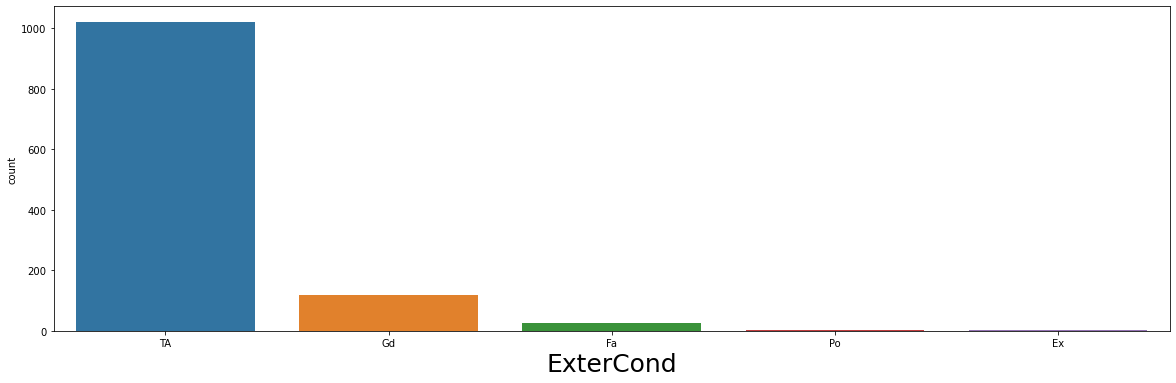

The value counts for Foundation is

CBlock    516
PConc     513
BrkTil    112
Slab       21
Stone       5
Wood        1
Name: Foundation, dtype: int64 



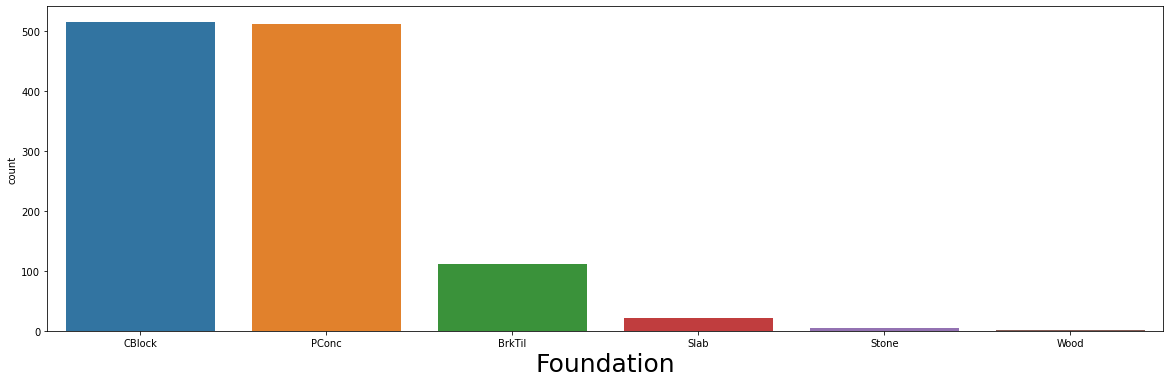

The value counts for BsmtQual is

TA      517
Gd      498
Ex       94
None     30
Fa       29
Name: BsmtQual, dtype: int64 



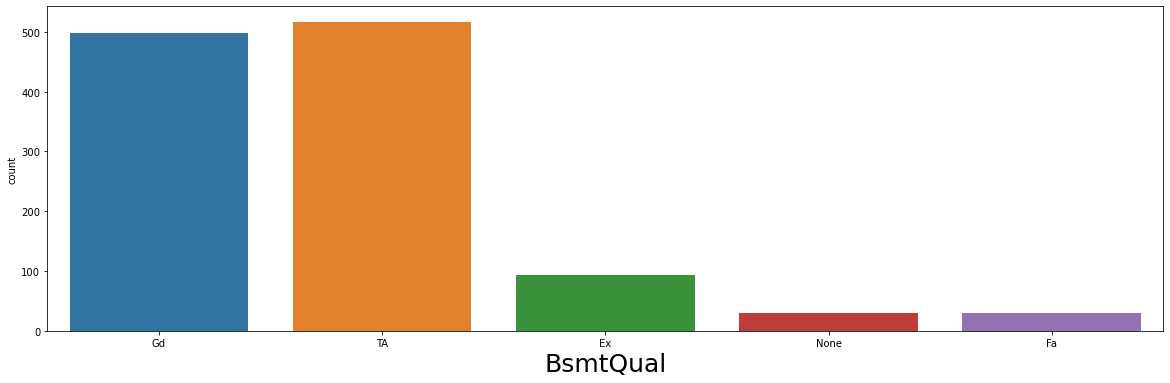

The value counts for BsmtCond is

TA      1041
Gd        56
Fa        39
None      30
Po         2
Name: BsmtCond, dtype: int64 



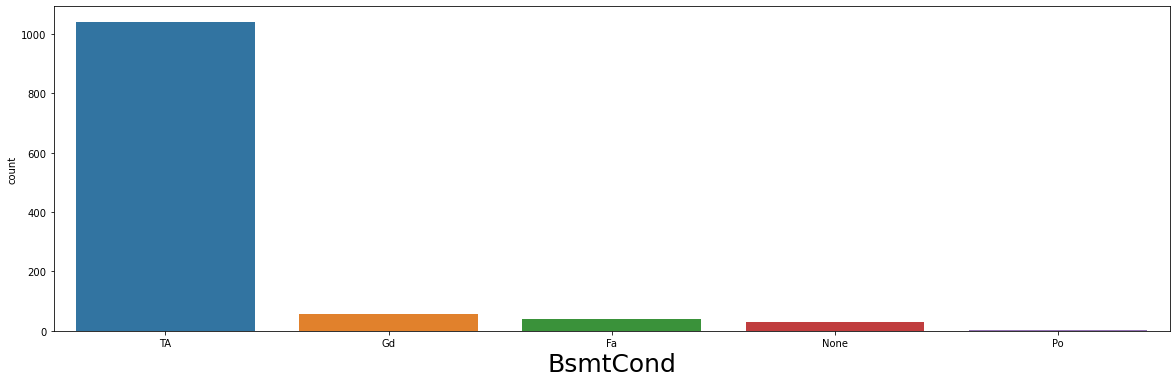

The value counts for BsmtExposure is

No      756
Av      180
Gd      108
Mn       93
None     31
Name: BsmtExposure, dtype: int64 



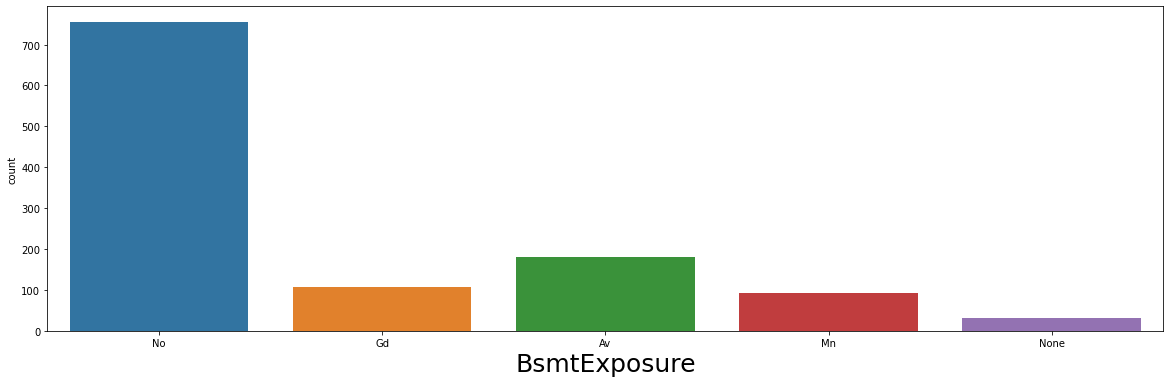

The value counts for BsmtFinType1 is

Unf     345
GLQ     330
ALQ     174
BLQ     121
Rec     109
LwQ      59
None     30
Name: BsmtFinType1, dtype: int64 



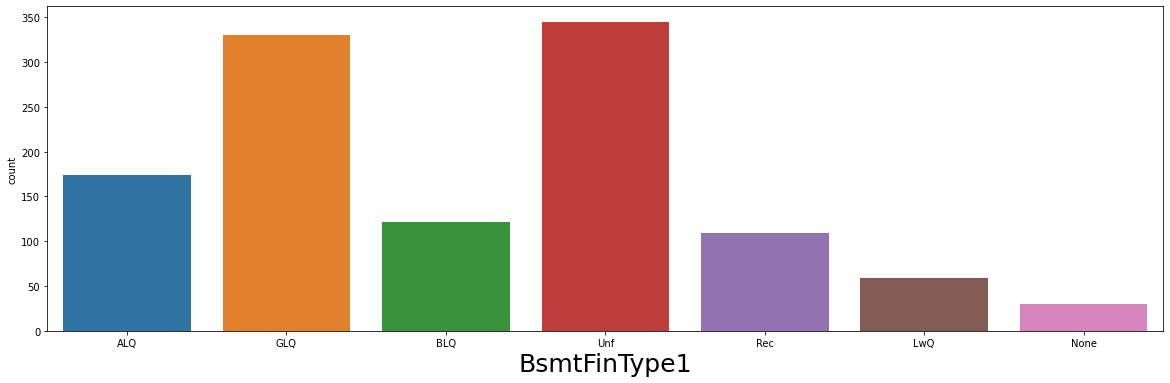

The value counts for BsmtFinType2 is

Unf     1002
Rec       43
LwQ       40
None      31
BLQ       24
ALQ       16
GLQ       12
Name: BsmtFinType2, dtype: int64 



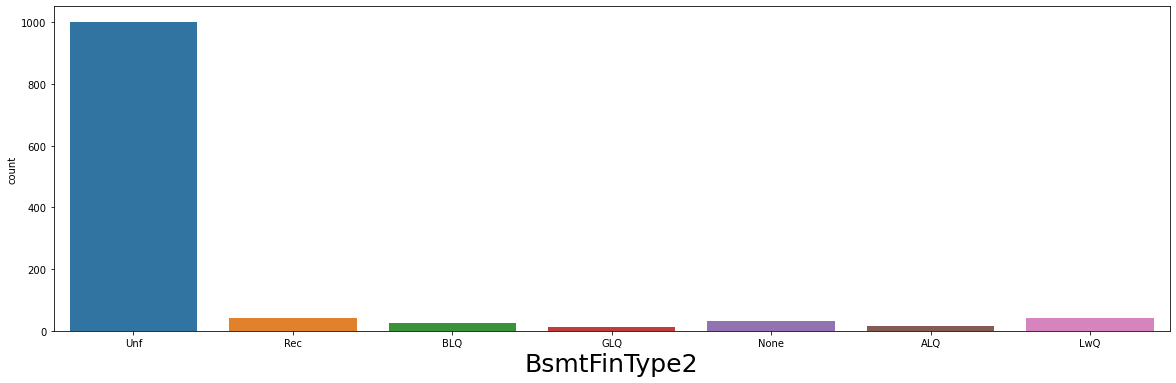

The value counts for Heating is

GasA     1143
GasW       14
Grav        5
Wall        4
Floor       1
OthW        1
Name: Heating, dtype: int64 



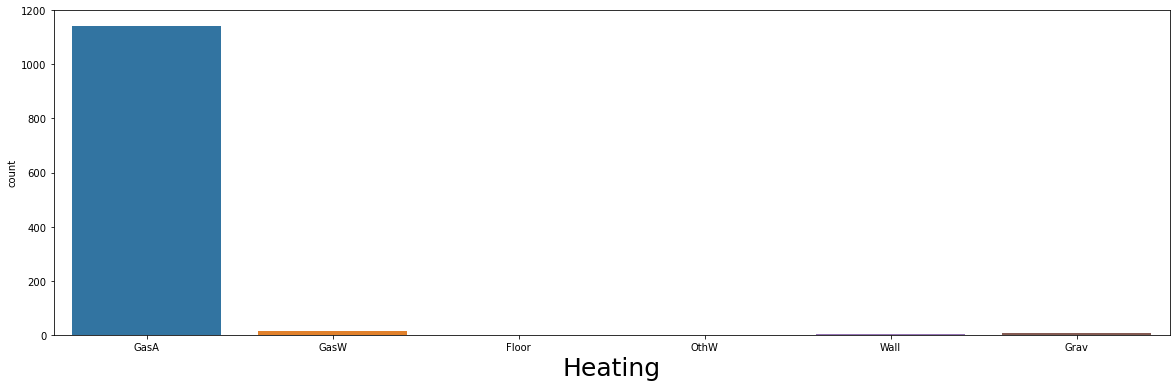

The value counts for HeatingQC is

Ex    585
TA    352
Gd    192
Fa     38
Po      1
Name: HeatingQC, dtype: int64 



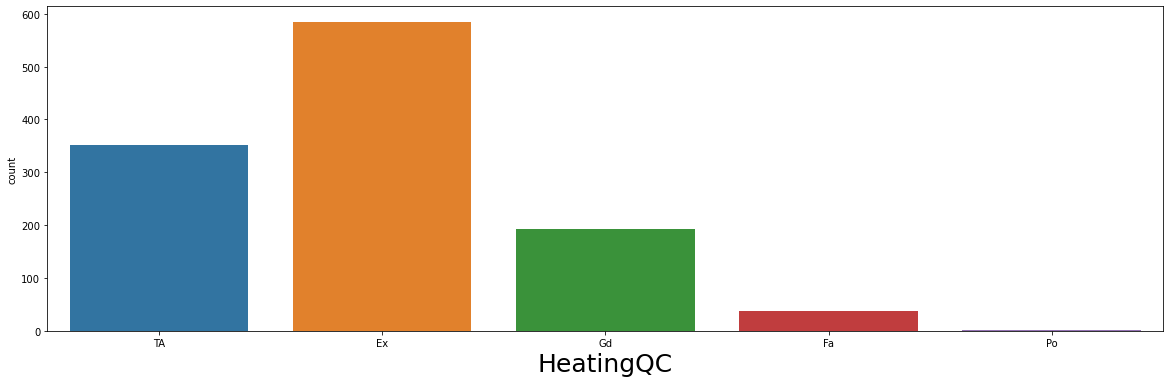

The value counts for CentralAir is

Y    1090
N      78
Name: CentralAir, dtype: int64 



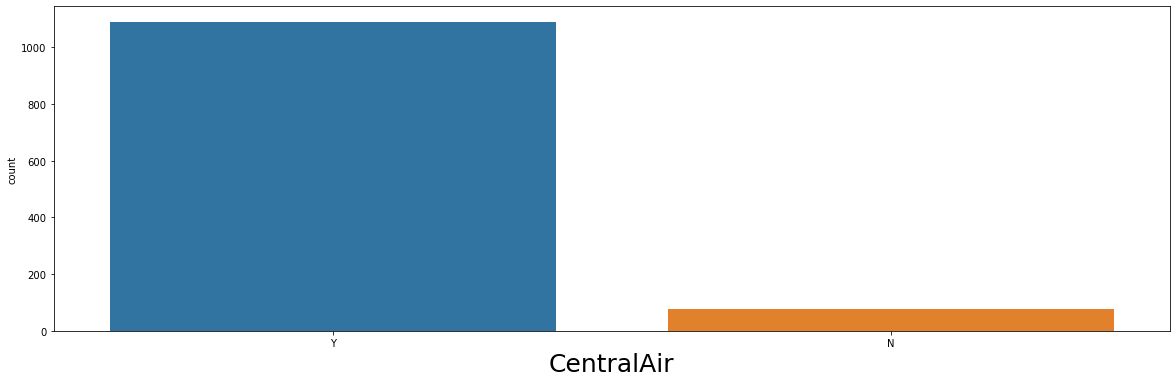

The value counts for Electrical is

SBrkr    1070
FuseA      74
FuseF      21
FuseP       2
Mix         1
Name: Electrical, dtype: int64 



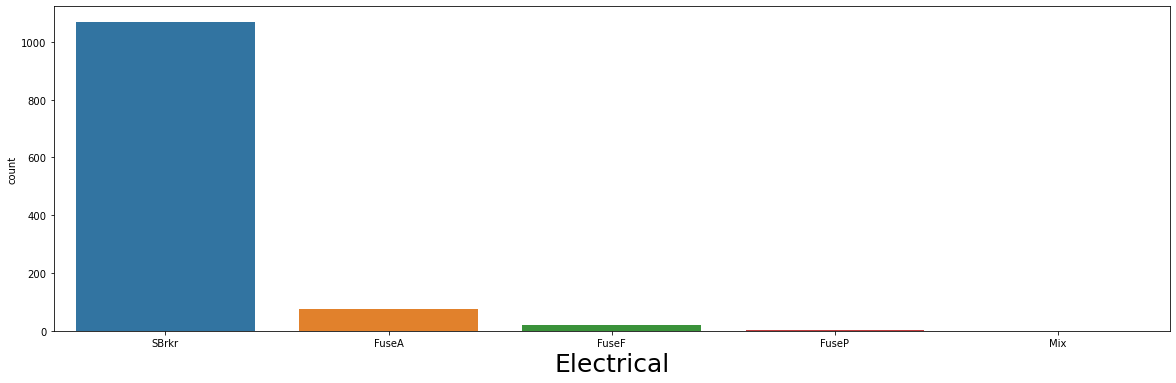

The value counts for BsmtFullBath is

0    686
1    468
2     13
3      1
Name: BsmtFullBath, dtype: int64 



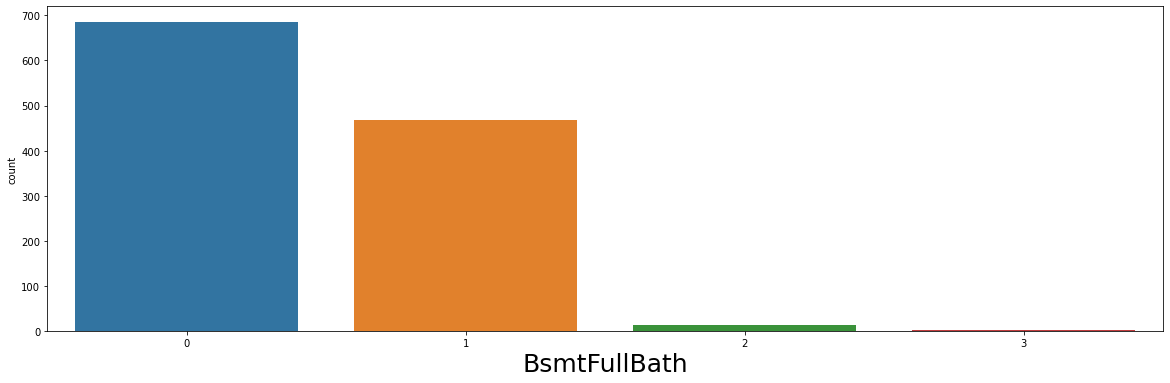

The value counts for BsmtHalfBath is

0    1105
1      61
2       2
Name: BsmtHalfBath, dtype: int64 



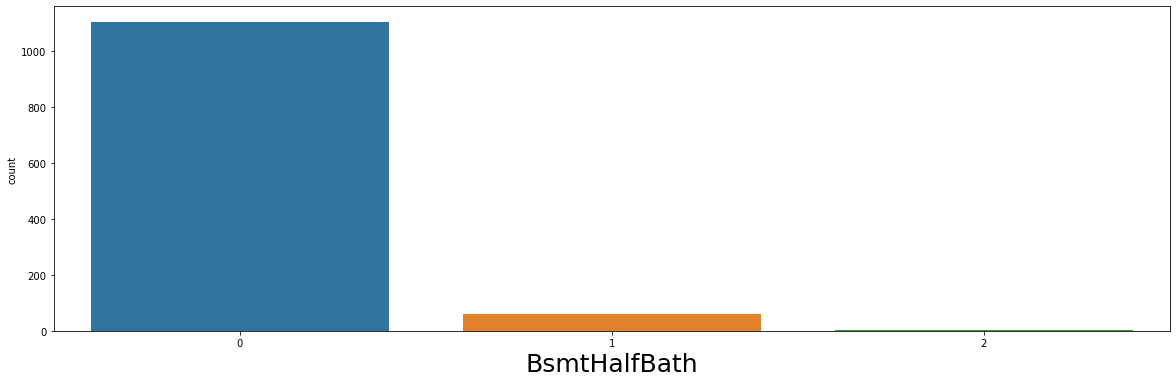

The value counts for FullBath is

2    610
1    524
3     27
0      7
Name: FullBath, dtype: int64 



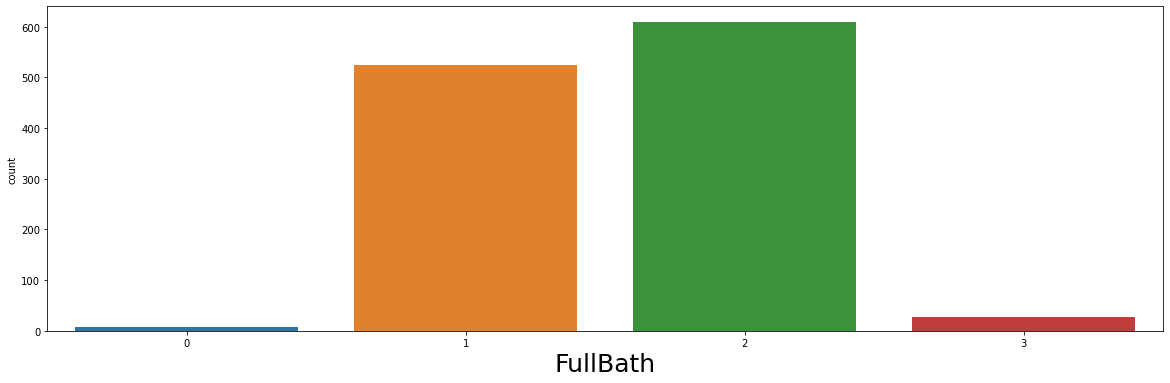

The value counts for HalfBath is

0    724
1    434
2     10
Name: HalfBath, dtype: int64 



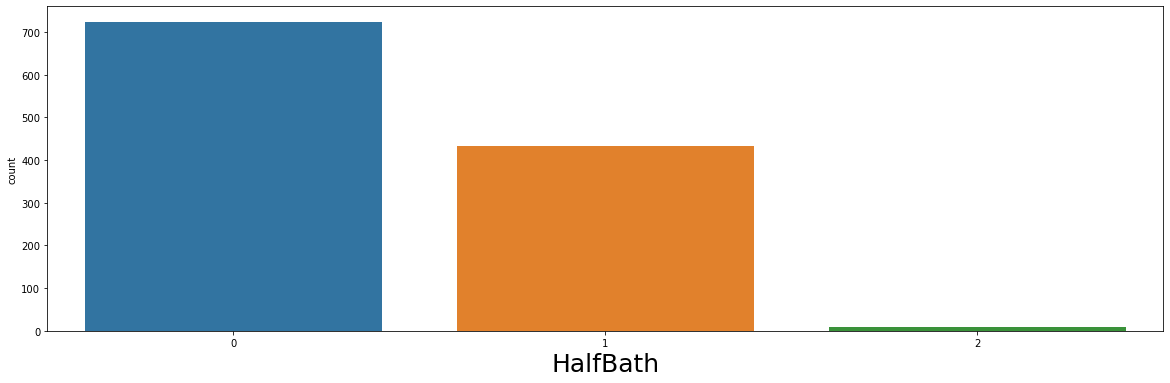

The value counts for BedroomAbvGr is

3    640
2    281
4    180
1     39
5     18
6      5
0      4
8      1
Name: BedroomAbvGr, dtype: int64 



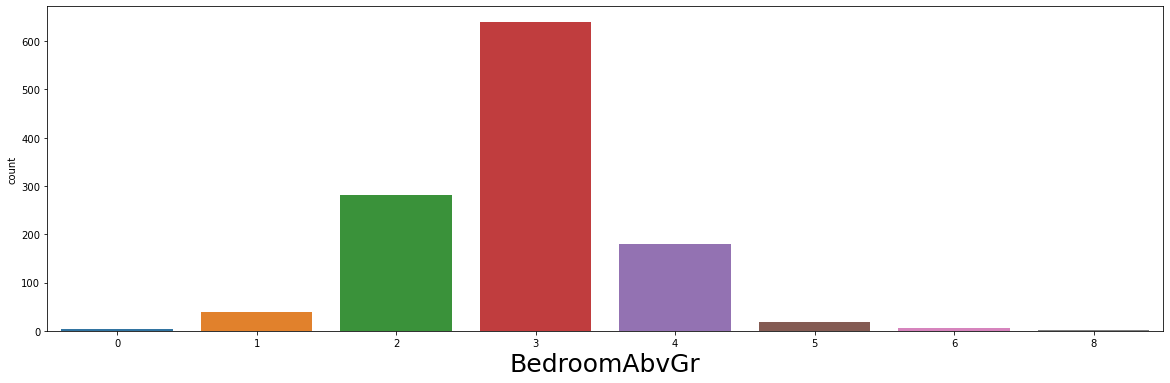

The value counts for KitchenAbvGr is

1    1114
2      52
3       1
0       1
Name: KitchenAbvGr, dtype: int64 



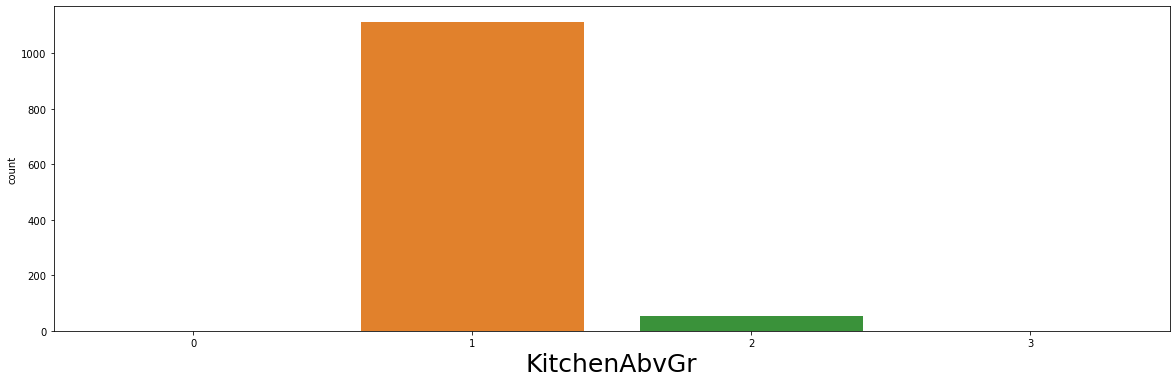

The value counts for KitchenQual is

TA    578
Gd    478
Ex     82
Fa     30
Name: KitchenQual, dtype: int64 



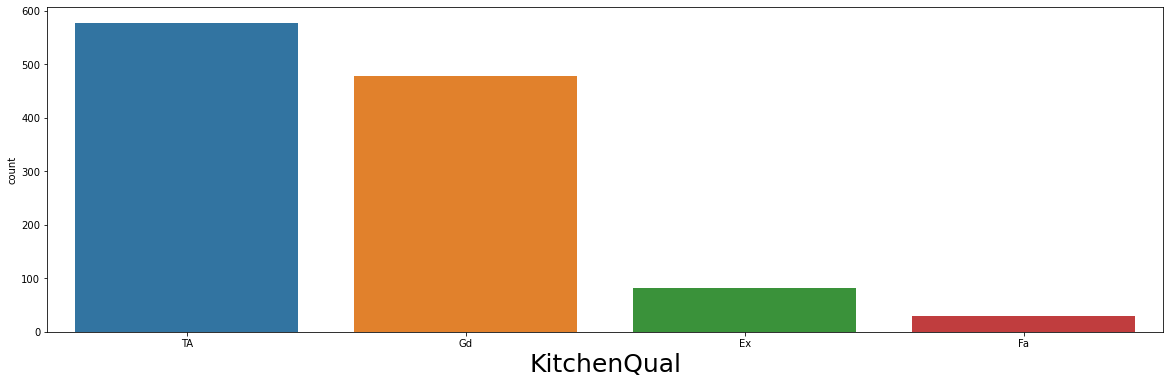

The value counts for TotRmsAbvGrd is

6     325
7     268
5     217
8     148
4      72
9      65
10     41
11     13
3      11
12      6
2       1
14      1
Name: TotRmsAbvGrd, dtype: int64 



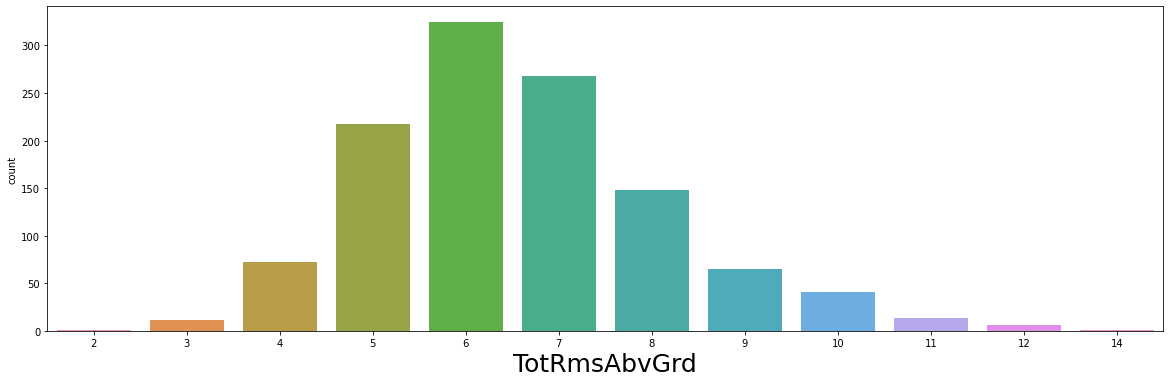

The value counts for Functional is

Typ     1085
Min2      30
Min1      25
Mod       12
Maj1      11
Maj2       4
Sev        1
Name: Functional, dtype: int64 



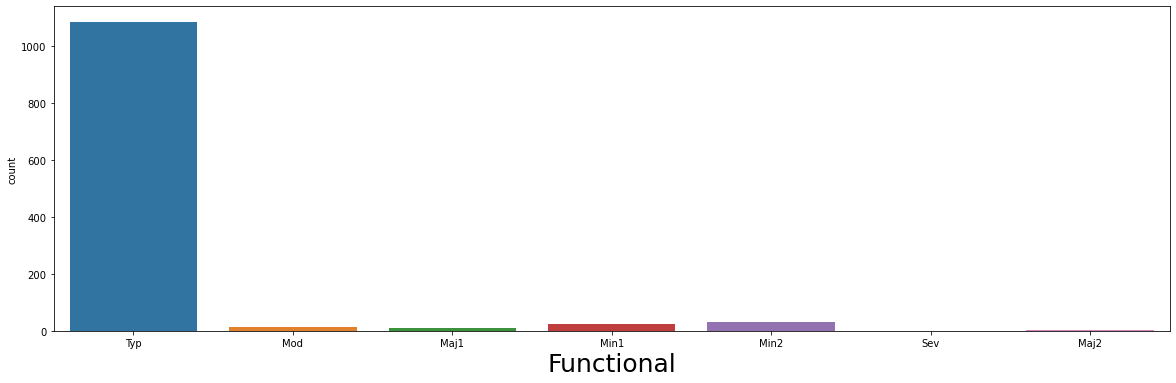

The value counts for Fireplaces is

0    551
1    518
2     94
3      5
Name: Fireplaces, dtype: int64 



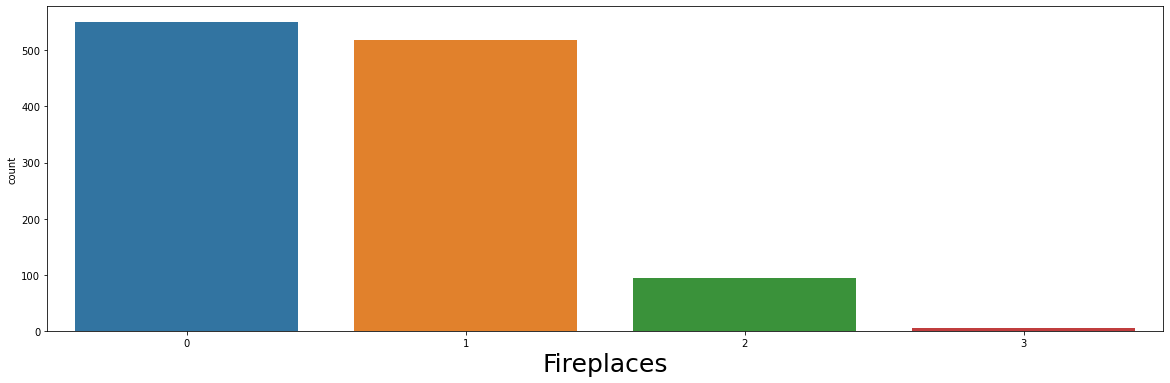

The value counts for FireplaceQu is

None    551
Gd      301
TA      252
Fa       25
Ex       21
Po       18
Name: FireplaceQu, dtype: int64 



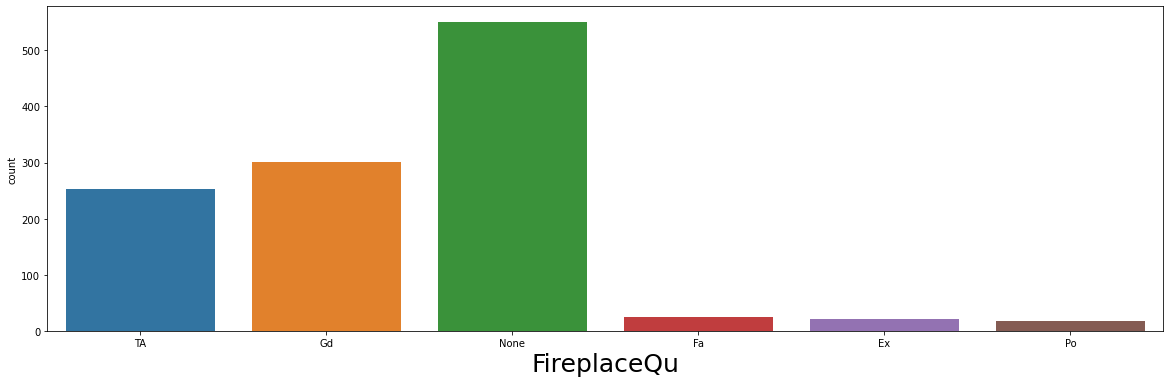

The value counts for GarageType is

Attchd     691
Detchd     314
BuiltIn     70
None        64
Basment     16
CarPort      8
2Types       5
Name: GarageType, dtype: int64 



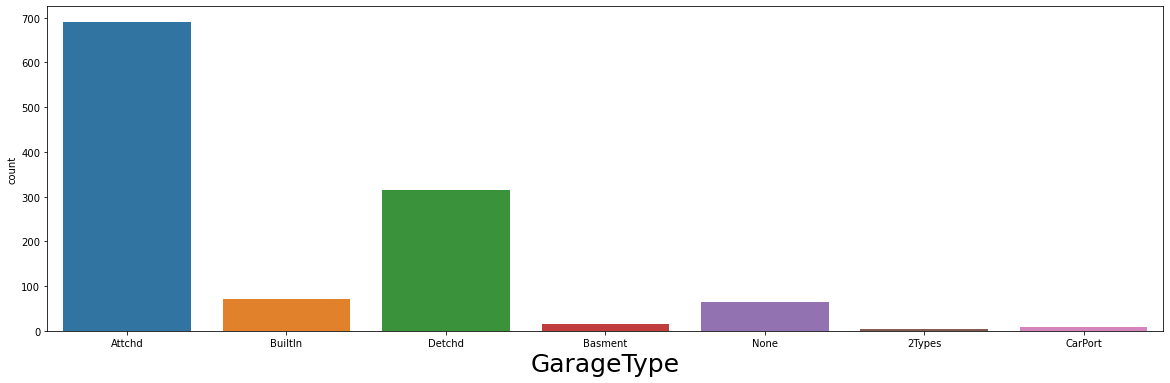

The value counts for GarageFinish is

Unf     487
RFn     339
Fin     278
None     64
Name: GarageFinish, dtype: int64 



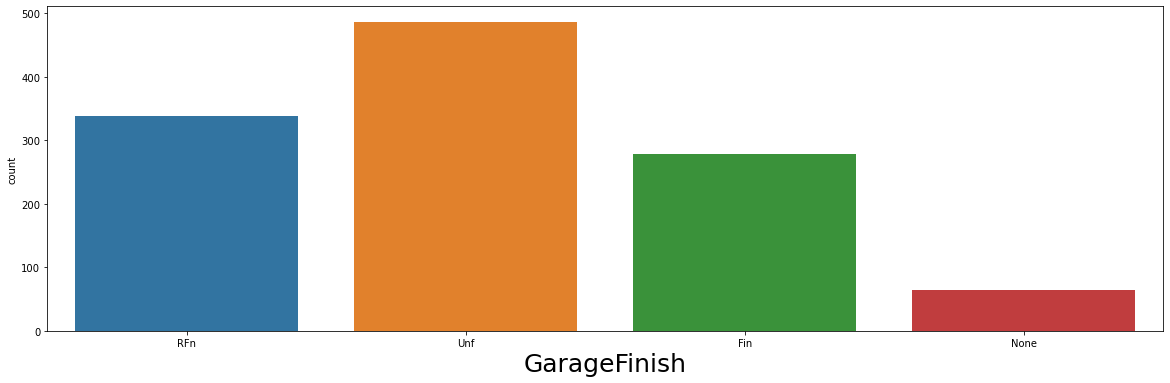

The value counts for GarageCars is

2    665
1    288
3    147
0     64
4      4
Name: GarageCars, dtype: int64 



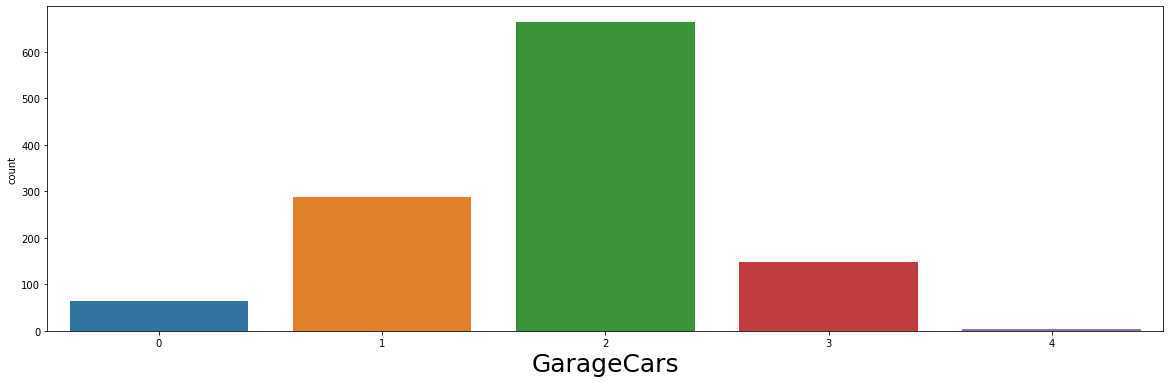

The value counts for GarageQual is

TA      1050
None      64
Fa        39
Gd        11
Ex         2
Po         2
Name: GarageQual, dtype: int64 



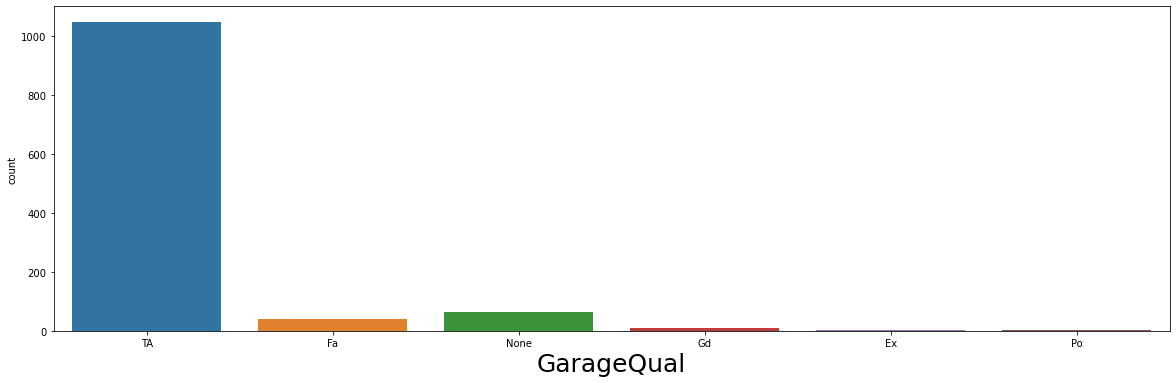

The value counts for GarageCond is

TA      1061
None      64
Fa        28
Gd         8
Po         6
Ex         1
Name: GarageCond, dtype: int64 



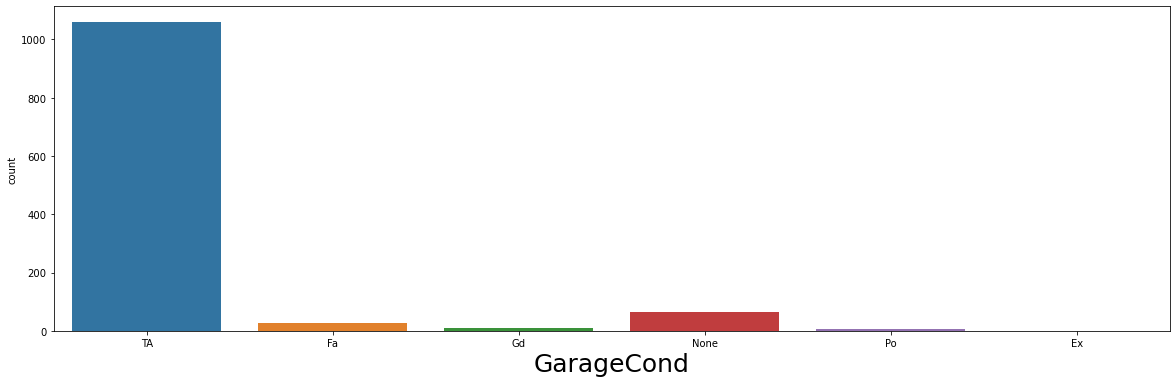

The value counts for PavedDrive is

Y    1071
N      74
P      23
Name: PavedDrive, dtype: int64 



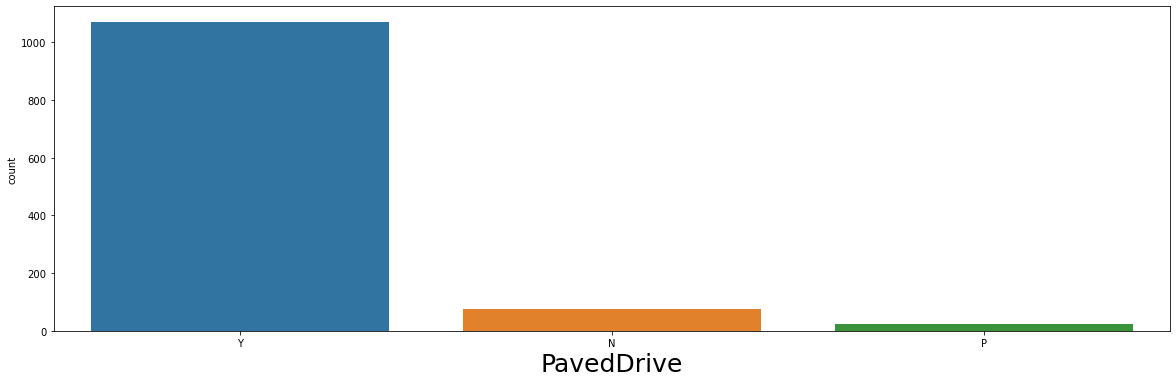

The value counts for PoolQC is

None    1161
Gd         3
Ex         2
Fa         2
Name: PoolQC, dtype: int64 



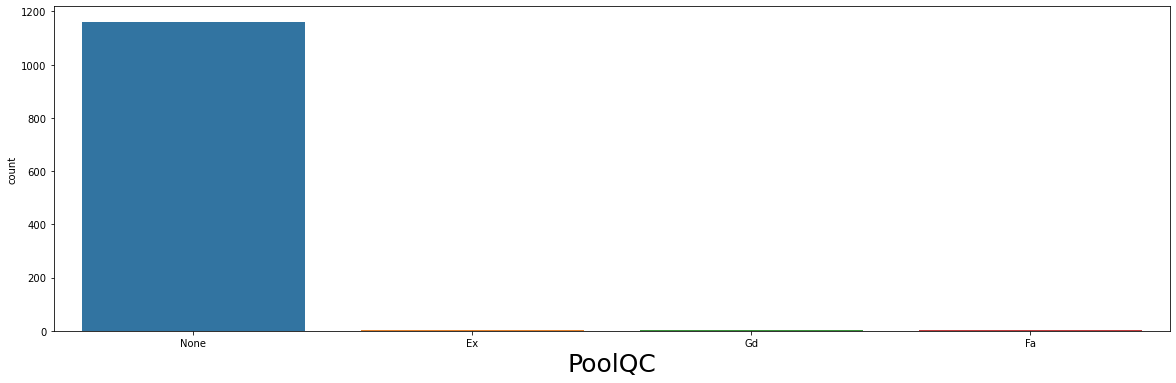

The value counts for Fence is

None     931
MnPrv    129
GdPrv     51
GdWo      47
MnWw      10
Name: Fence, dtype: int64 



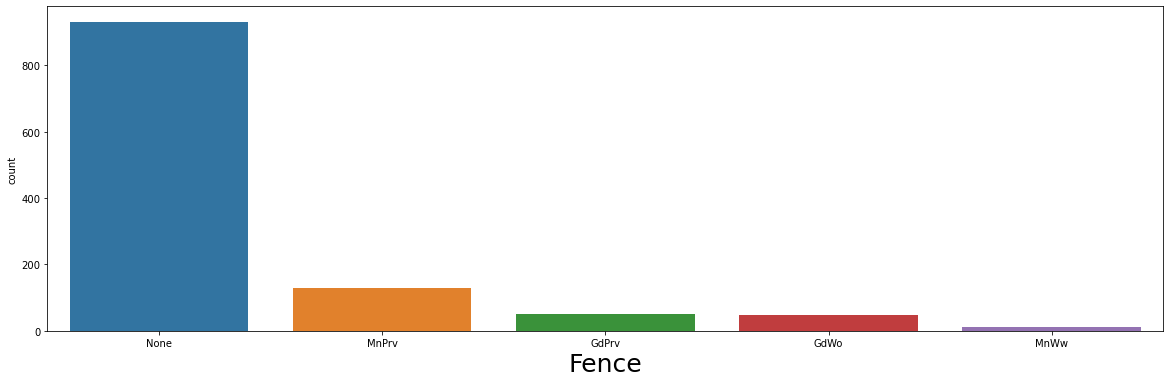

The value counts for MiscFeature is

None    1124
Shed      40
Gar2       2
TenC       1
Othr       1
Name: MiscFeature, dtype: int64 



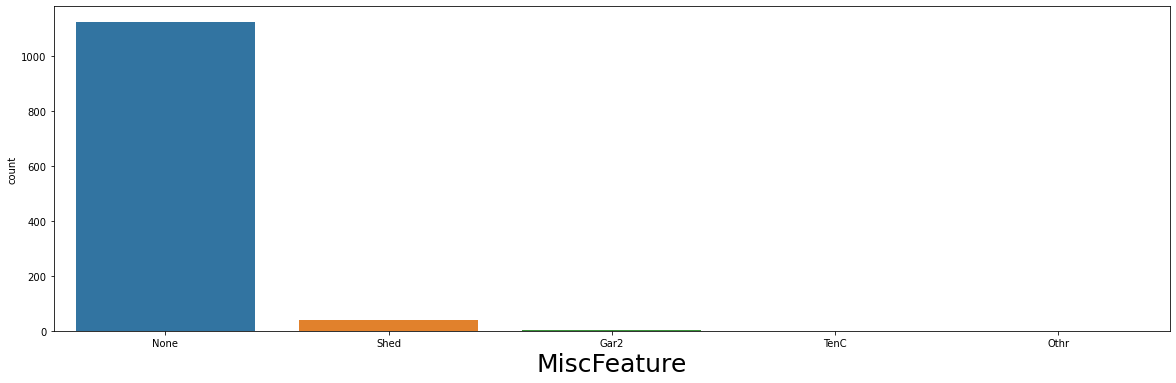

The value counts for SaleType is

WD       999
New      106
COD       38
ConLD      8
ConLI      5
ConLw      4
Oth        3
CWD        3
Con        2
Name: SaleType, dtype: int64 



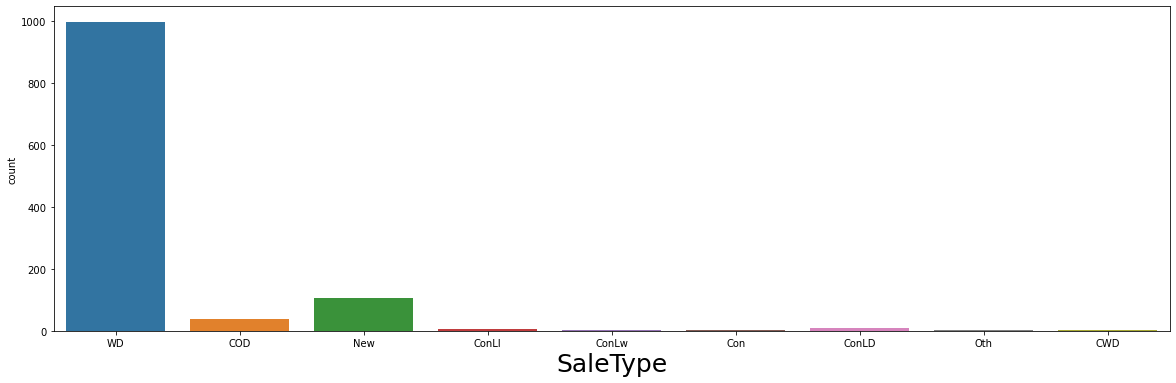

The value counts for SaleCondition is

Normal     945
Partial    108
Abnorml     81
Family      18
Alloca      12
AdjLand      4
Name: SaleCondition, dtype: int64 



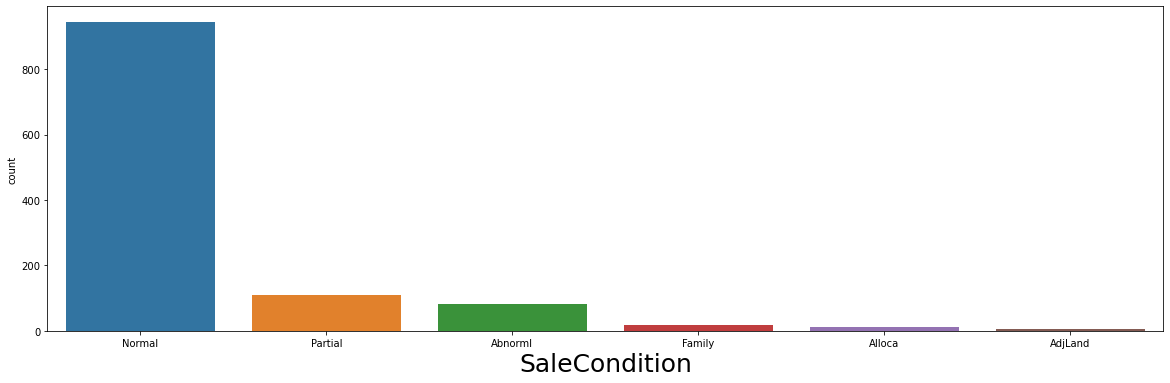

The value counts for SalePrice is

140000    18
135000    16
155000    12
139000    11
160000    11
          ..
203000     1
144900     1
37900      1
178400     1
183200     1
Name: SalePrice, Length: 581, dtype: int64 



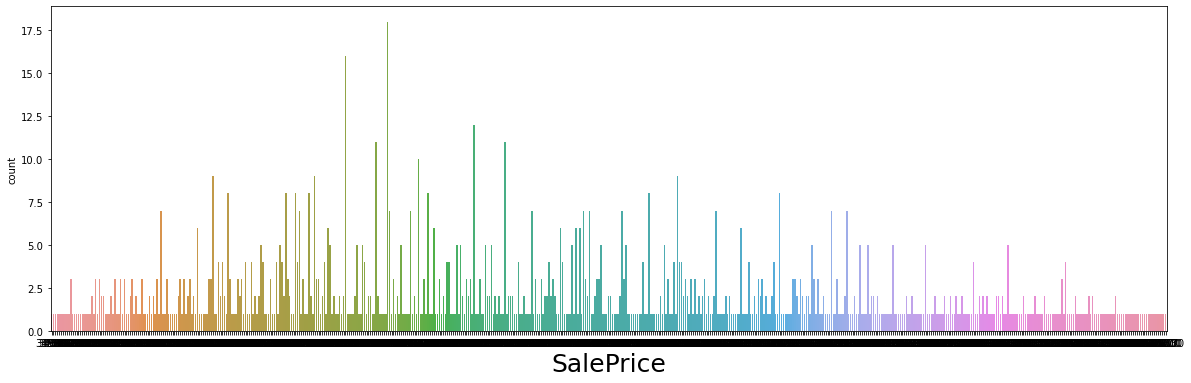

In [16]:
plotnumber = 1
for column in train_cat :
    plt.figure(figsize = (20,400))
    if plotnumber <=56:
        ax = plt.subplot(56,1,plotnumber)
        sns.countplot(train_cat[column])
        plt.xlabel(column,fontsize = 25)
        print(f"The value counts for {column} is\n")
        print(train_cat[column].value_counts(),'\n')
        plt.show()
    plotnumber +=1

## Encoding data

In [17]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

for i in train.columns:
    if train[i].dtypes == "object":
        train[i] = enc.fit_transform(train[i].values.reshape(-1,1))
        
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,120,3.0,0.057324,-1.213954,1.0,1.0,0.0,3.0,0.0,4.0,...,-0.077648,3.0,4.0,1.0,-0.193133,-1.719437,-0.604806,8.0,4.0,128000
1,20,3.0,1.125853,1.100521,1.0,1.0,0.0,3.0,0.0,4.0,...,-0.077648,3.0,4.0,1.0,-0.193133,1.320612,-0.604806,8.0,4.0,268000
2,60,3.0,1.007841,0.158048,1.0,1.0,0.0,3.0,0.0,1.0,...,-0.077648,3.0,4.0,1.0,-0.193133,-0.076750,-0.604806,8.0,4.0,269790
3,20,3.0,1.502999,0.496002,1.0,1.0,0.0,3.0,0.0,4.0,...,-0.077648,3.0,2.0,1.0,-0.193133,-2.209015,1.649761,0.0,4.0,190000
4,20,3.0,0.057324,1.196626,1.0,1.0,0.0,3.0,0.0,2.0,...,-0.077648,3.0,4.0,1.0,-0.193133,-0.076750,0.899576,8.0,4.0,215000


## Correlation of features with target variable

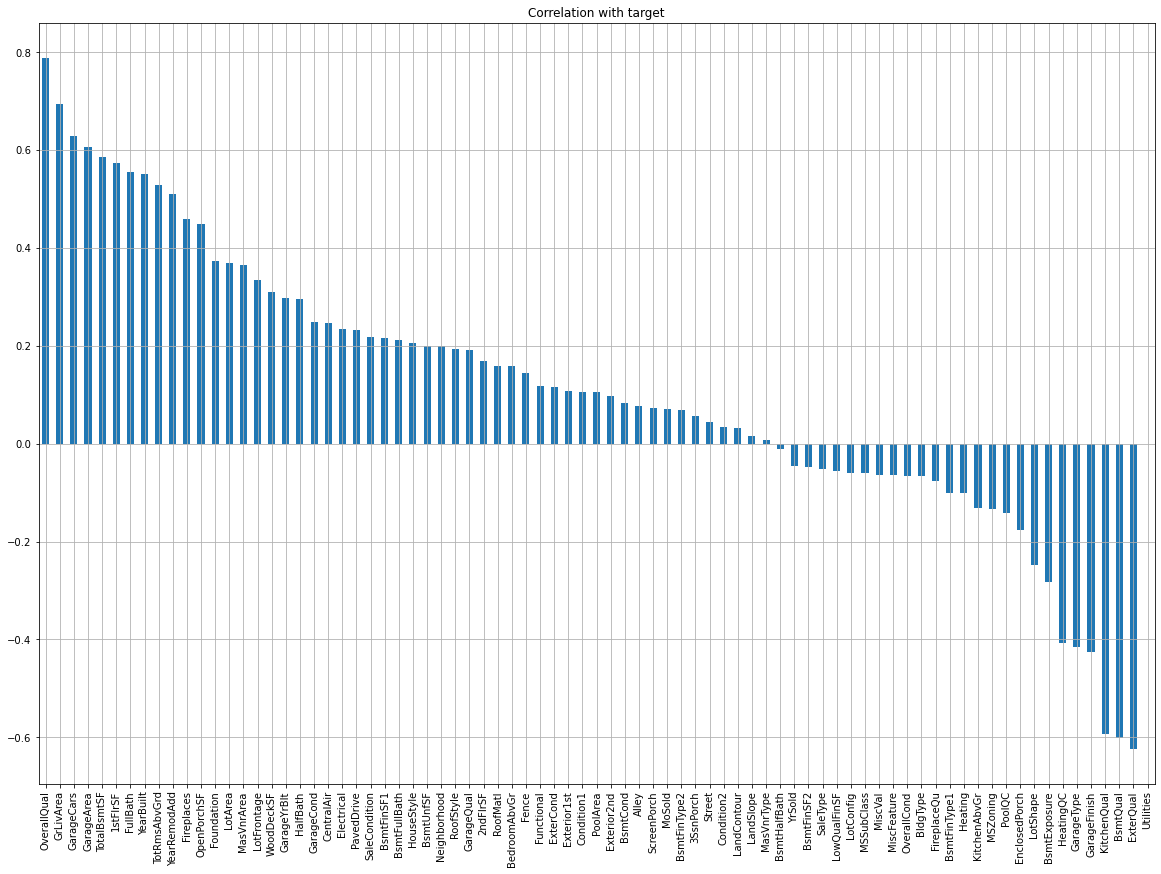

In [18]:
corr = train.drop('SalePrice', axis = 1).corrwith(train.SalePrice).sort_values(ascending=False)

corr.plot(kind = 'bar', grid = True, figsize = (20,14),
          title = "Correlation with target")
plt.show()

## Model building to predict SalePrice

In [19]:
x = train.drop('SalePrice', axis = 1)
y = train.SalePrice

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sys
from sklearn import metrics
!{sys.executable} -m pip install xgboost
import xgboost as xgb
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [30]:
lr = LinearRegression()
xgb = xgb.XGBRegressor()
svr = SVR()

In [31]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [32]:
for i in range(0,20):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.2, random_state = i)
    xgb.fit(x_train,y_train)
    y_train_pred = xgb.predict(x_train)
    y_test_pred = xgb.predict(x_test)
    print(f"At random state {i}, the training accuracy is : {r2_score(y_train,y_train_pred)}")
    print(f"At random state {i}, the testing accuracy is : {r2_score(y_test,y_test_pred)}\n")

At random state 0, the training accuracy is : 0.999942840140487
At random state 0, the testing accuracy is : 0.8277884666935345

At random state 1, the training accuracy is : 0.9999092246821515
At random state 1, the testing accuracy is : 0.8623195084513955

At random state 2, the training accuracy is : 0.9999396056636701
At random state 2, the testing accuracy is : 0.8600514608725707

At random state 3, the training accuracy is : 0.9999480531587412
At random state 3, the testing accuracy is : 0.8460587078812701

At random state 4, the training accuracy is : 0.9999661187976403
At random state 4, the testing accuracy is : 0.8657967830281643

At random state 5, the training accuracy is : 0.9999266945017794
At random state 5, the testing accuracy is : 0.807710710300022

At random state 6, the training accuracy is : 0.9999447536060919
At random state 6, the testing accuracy is : 0.8881076965284697

At random state 7, the training accuracy is : 0.9999123748350962
At random state 7, the test

In [33]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.2, random_state = 14)
xgb.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [34]:
y_test_pred = xgb.predict(x_test)
print(f"The accuracy score is {r2_score(y_test,y_test_pred)*100:.2f} %")

The accuracy score is 89.61 %


## Cross Validation

In [35]:
test_acc = r2_score(y_test,y_test_pred)

for i in range (2,15):
    cv_score = cross_val_score(xgb,x_scaled,y,cv = i)
    cv_mean  = cv_score.mean()
    print(f"At cv = {i},cv_score = {cv_mean*100:.4f} and accuracy for testing = {test_acc*100:.4f}\n")

At cv = 2,cv_score = 83.2505 and accuracy for testing = 89.6135

At cv = 3,cv_score = 86.2469 and accuracy for testing = 89.6135

At cv = 4,cv_score = 82.0654 and accuracy for testing = 89.6135

At cv = 5,cv_score = 82.8362 and accuracy for testing = 89.6135

At cv = 6,cv_score = 83.0184 and accuracy for testing = 89.6135

At cv = 7,cv_score = 81.9059 and accuracy for testing = 89.6135

At cv = 8,cv_score = 82.3305 and accuracy for testing = 89.6135

At cv = 9,cv_score = 83.2749 and accuracy for testing = 89.6135

At cv = 10,cv_score = 84.8536 and accuracy for testing = 89.6135

At cv = 11,cv_score = 83.4922 and accuracy for testing = 89.6135

At cv = 12,cv_score = 83.5270 and accuracy for testing = 89.6135

At cv = 13,cv_score = 83.8073 and accuracy for testing = 89.6135

At cv = 14,cv_score = 82.8210 and accuracy for testing = 89.6135



In [36]:
cv_score = cross_val_score(xgb,x_scaled,y,cv = 3)
cv_mean = cv_score.mean()
cv_mean

0.8624685073574488

## L1 form

In [37]:
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV 
lasscv = LassoCV(alphas = None, max_iter = 2, normalize = True)
lasscv.fit(x_train,y_train)

LassoCV(max_iter=2, normalize=True)

In [38]:
alpha = lasscv.alpha_
alpha

96.06415053810113

In [39]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=96.06415053810113)

In [40]:
lasso_reg.score(x_test,y_test)

0.7436166038127401

## L2 form

In [41]:
# L2 form
ridgecv = RidgeCV(alphas = np.arange(0.001,0.1,0.01),normalize = True) #arange = giving range for learning rate
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [42]:
ridgecv.alpha_

0.09099999999999998

In [43]:
ridge_model = Ridge(ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.09099999999999998)

In [44]:
ridge_model.score(x_test,y_test)

0.7385857576583226

### L1 and L2  are both around 0.7 and they do not differ much, so our model does not overfit

Text(0.5, 1.0, 'Predicted vs Actual model')

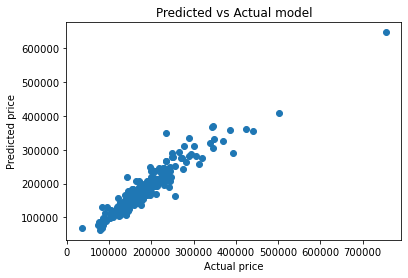

In [45]:
# Let's see how closely is our predicted and actual values are

plt.scatter(y_test,y_test_pred)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Predicted vs Actual model')

## Saving the model

In [46]:
import pickle
filename = 'Housing_price_prediction.pickle'

pickle.dump(xgb,open(filename,'wb'))

# TEST DATA

In [47]:
test = pd.read_csv('C:/Users/HP/Documents/DataTrained/Intern Assignments/Questions/Project-Housing--2---1-/Project-Housing_splitted/test.csv')
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


In [48]:
test.isna().sum().sum()

1407

In [49]:
test = test.drop(columns = ['Id'],axis = 1)

In [50]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     292 non-null    int64  
 1   MSZoning       292 non-null    object 
 2   LotFrontage    247 non-null    float64
 3   LotArea        292 non-null    int64  
 4   Street         292 non-null    object 
 5   Alley          14 non-null     object 
 6   LotShape       292 non-null    object 
 7   LandContour    292 non-null    object 
 8   Utilities      292 non-null    object 
 9   LotConfig      292 non-null    object 
 10  LandSlope      292 non-null    object 
 11  Neighborhood   292 non-null    object 
 12  Condition1     292 non-null    object 
 13  Condition2     292 non-null    object 
 14  BldgType       292 non-null    object 
 15  HouseStyle     292 non-null    object 
 16  OverallQual    292 non-null    int64  
 17  OverallCond    292 non-null    int64  
 18  YearBuilt 

In [51]:
test['LotFrontage'] = test['LotFrontage'].fillna(test['LotFrontage'].median())
test['Alley'] = test['Alley'].fillna('None')
test['MasVnrType'] = test['MasVnrType'].fillna('None')
test['MasVnrArea'] = test['MasVnrArea'].fillna(0)
test['BsmtQual'] = test['BsmtQual'].fillna('None')
test['BsmtCond'] = test['BsmtCond'].fillna('None')
test['BsmtExposure'] = test['BsmtExposure'].fillna('None')
test['BsmtFinType1'] = test['BsmtFinType1'].fillna('None')
test['BsmtFinType2'] = test['BsmtFinType2'].fillna('None')
test['Electrical'] = test['Electrical'].fillna('None')
test['FireplaceQu'] = test['FireplaceQu'].fillna('None')
test['GarageType'] = test['GarageType'].fillna('None')
test['GarageYrBlt'] = test['GarageYrBlt'].fillna(0)
test['GarageFinish'] = test['GarageFinish'].fillna('None')
test['GarageQual'] = test['GarageQual'].fillna('None')
test['GarageCond'] = test['GarageCond'].fillna('None')
test['PoolQC'] = test['PoolQC'].fillna('None')
test['Fence'] = test['Fence'].fillna('None')
test['MiscFeature'] = test['MiscFeature'].fillna('None')

In [52]:
test.isna().sum().sum()

0

## Encoding the data

In [53]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()

for i in test.columns:
    if test[i].dtypes == 'object':
        test[i] = oe.fit_transform(test[i].values.reshape(-1,1))

test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,2.0,86.0,14157,1.0,1.0,0.0,1.0,0.0,0.0,...,0,0,0.0,4.0,0.0,0,7,2007,5.0,2.0
1,120,2.0,65.0,5814,1.0,1.0,0.0,3.0,0.0,1.0,...,0,0,0.0,4.0,0.0,0,8,2009,0.0,0.0
2,20,2.0,65.0,11838,1.0,1.0,3.0,3.0,0.0,4.0,...,0,0,0.0,4.0,0.0,0,6,2009,5.0,2.0
3,70,2.0,75.0,12000,1.0,1.0,3.0,0.0,0.0,4.0,...,0,0,0.0,4.0,0.0,0,7,2009,5.0,2.0
4,60,2.0,86.0,14598,1.0,1.0,0.0,3.0,0.0,1.0,...,0,0,0.0,4.0,0.0,0,1,2008,5.0,2.0


In [54]:
# Scaling the data first

scaler = StandardScaler()
X_scaled = scaler.fit_transform(test)

In [55]:
# appending the predicted prices to an empty list

price = []
for i in range(0,len(X_scaled)):
    price.append(xgb.predict([X_scaled[i]]).tolist())

In [56]:
prices = sum(price,[]) #combining into a single list
print('\n ******* The predicted prices for test dataset is*******\n\n', prices)


 ******* The predicted prices for test dataset is*******

 [401755.53125, 226914.578125, 217945.40625, 187367.90625, 260498.828125, 84747.7890625, 132480.140625, 341713.53125, 266730.0625, 158140.296875, 73643.3984375, 144809.96875, 119347.7734375, 203946.765625, 280121.03125, 134146.40625, 108983.8203125, 129874.984375, 165090.578125, 193383.84375, 148680.046875, 140100.390625, 142604.109375, 51635.09375, 87883.96875, 124509.59375, 171160.4375, 148141.78125, 157855.515625, 79884.015625, 122864.5859375, 182568.9375, 208809.4375, 161279.375, 116612.4140625, 158215.1875, 177676.8125, 119946.1953125, 149604.4375, 159764.046875, 112786.1875, 437040.125, 179918.4375, 180422.0625, 127640.4921875, 138504.640625, 69898.1640625, 96232.3046875, 186585.40625, 286252.9375, 132653.765625, 238822.328125, 101377.8203125, 85253.7578125, 364079.5625, 122090.1484375, 156457.9375, 163363.1875, 95559.3828125, 227635.15625, 106913.9296875, 166857.421875, 115759.7578125, 141268.453125, 188591.25, 101361.39